## Initial setup
##### This analysis using ema is based on the work of Enayat A. Moallemi created on 22 May 2018 at the Fraunhofer ISI, Karlsruhe. In that instance, the analysis was done for the MATISSE model.

In [1]:

'''
Based on Enayat A. Moallemi version from May 2018

edited by Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 18 December 2019

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Anaconda3\Lib\site-packages\ema_workbench')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\angel\Anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\angel\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


## Load the results

In [2]:
from ema_workbench import load_results

results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\emaWorkbench\data\gr4sp_2020-Jan-22.tar-MC.gz')


In [3]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

In [4]:
experiments

,consumption,energyEfficiency,onsiteGeneration,rooftopPV,solarUptake,scenario,policy,model
0,Step change,Slow change,High DER,residential,High DER,None,0,Gr4sp
1,Step change,Central,Step change,both,Slow change,None,1,Gr4sp
2,Central,Central,Step change,both,Step change,None,2,Gr4sp
3,High DER,Central,High DER,business,Fast change,None,3,Gr4sp
4,High DER,Slow change,Step change,residential,Central,None,4,Gr4sp
5,High DER,Step change,Fast change,business,Step change,None,5,Gr4sp
6,High DER,Central,High DER,residential,Fast change,None,6,Gr4sp
7,Central,Step change,Fast change,residential,Step change,None,7,Gr4sp
8,Slow change,Central,Step change,both,Fast change,None,8,Gr4sp
9,Step change,Step change,High DER,business,High DER,None,9,Gr4sp


In [5]:
#outcomes Options: wholesalePriceYear, GHGYear, tariddsYear, primarySpotProductionYear,
# secondarySpotProductionYear, offSpotProductionYear, rooftopPvProductionYear
# numActorsYear
outcomes_to_swow = ['GHGYear','wholesalePriceYear', 'tariffsYear','primarySpotProductionYear', 'secondarySpotProductionYear', 'offSpotProductionYear', 'rooftopPVProductionYear' ]

levers = ['consumption', 'energyEfficiency', 'onsiteGeneration', 'rooftopPV', 'solarUptake']
#levers = ['rooftopPV', 'solarUptake']

#from startYear
startYear = 2019
startYearShift = (startYear - 1998)
#startYearShift = (startYear - 1997) * 12
time = outcomes['TIMEYear'][0, startYearShift:]
#index = pd.to_datetime(time, format = '%Y-%m-%d')
index = pd.to_datetime(time, format = '%Y')


## Boxplot

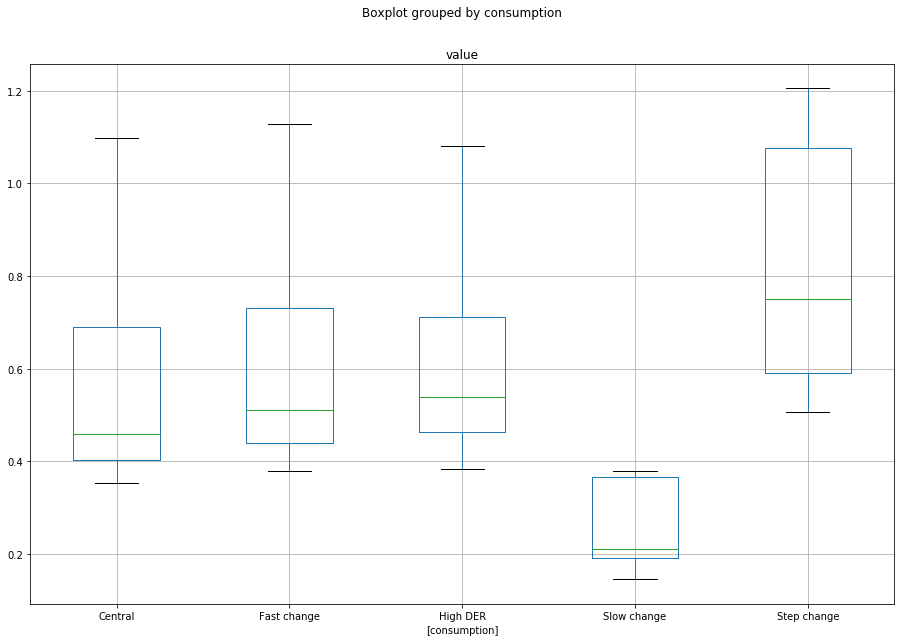

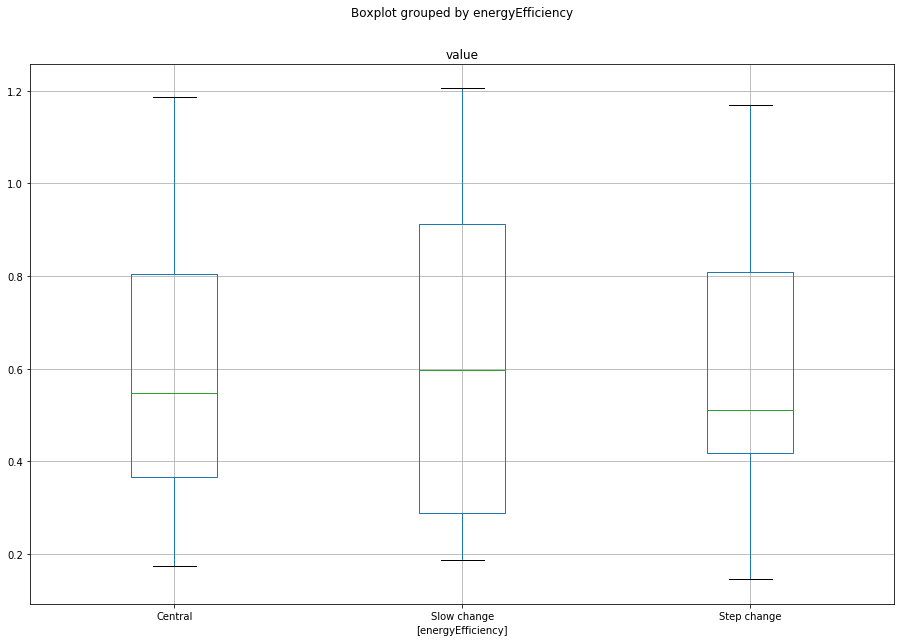

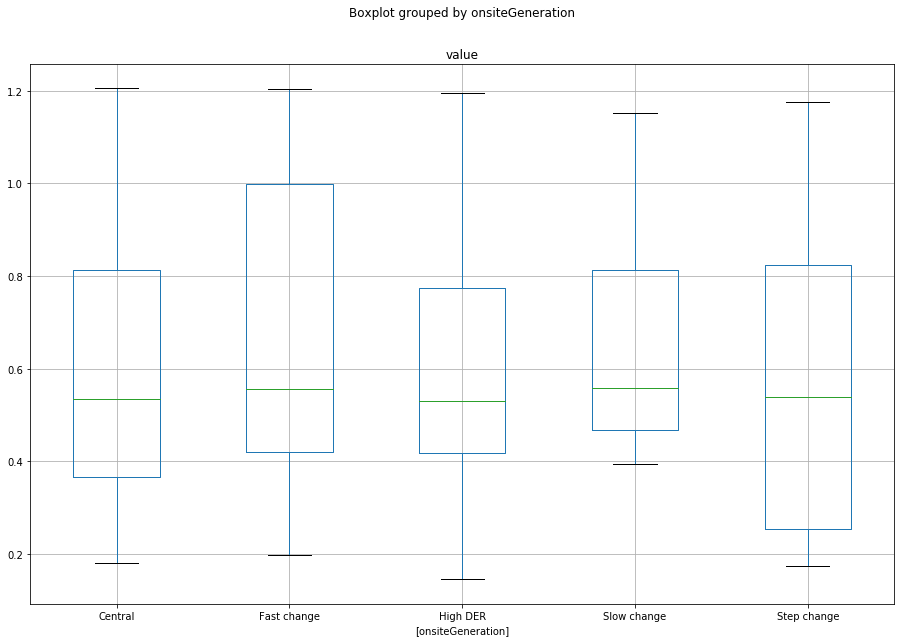

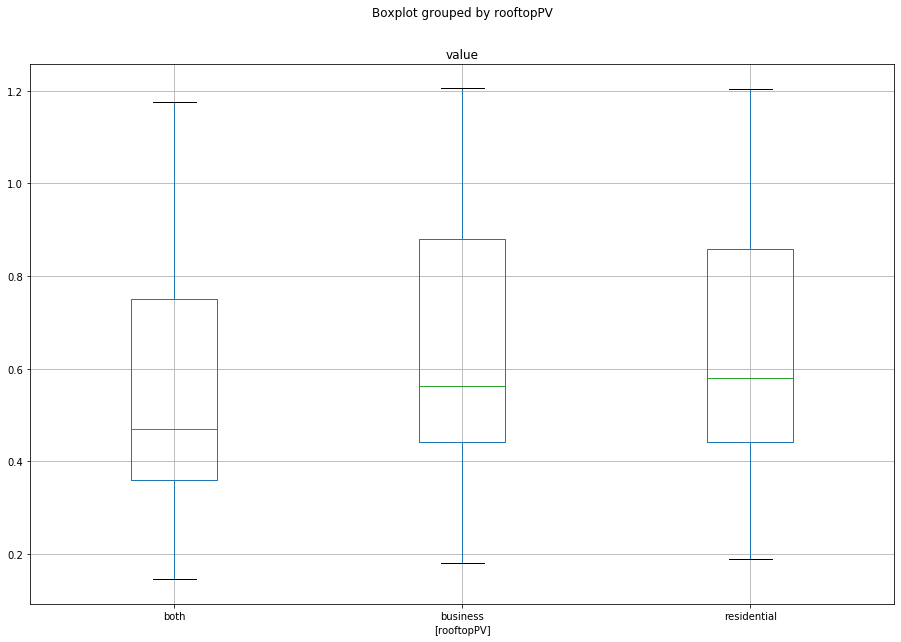

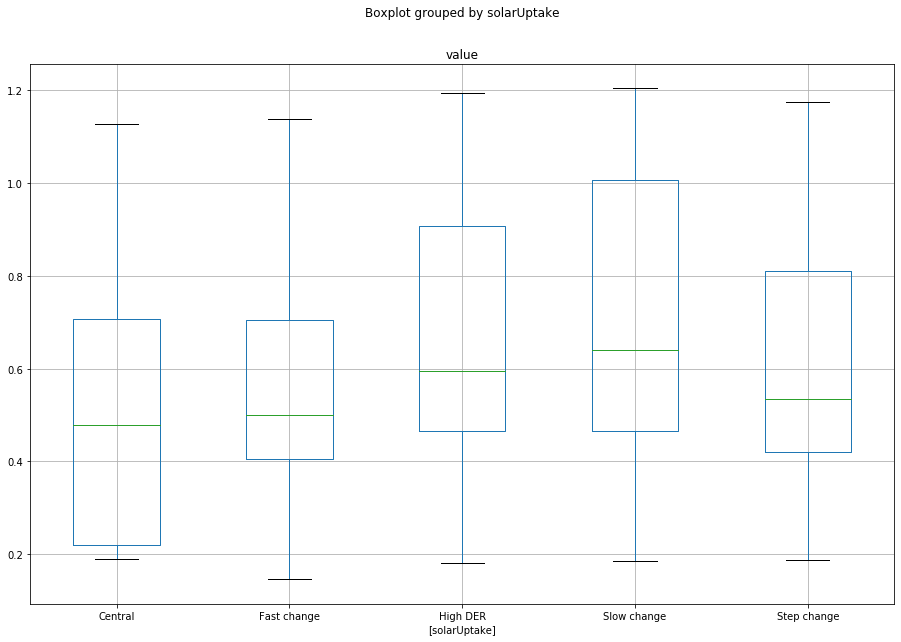

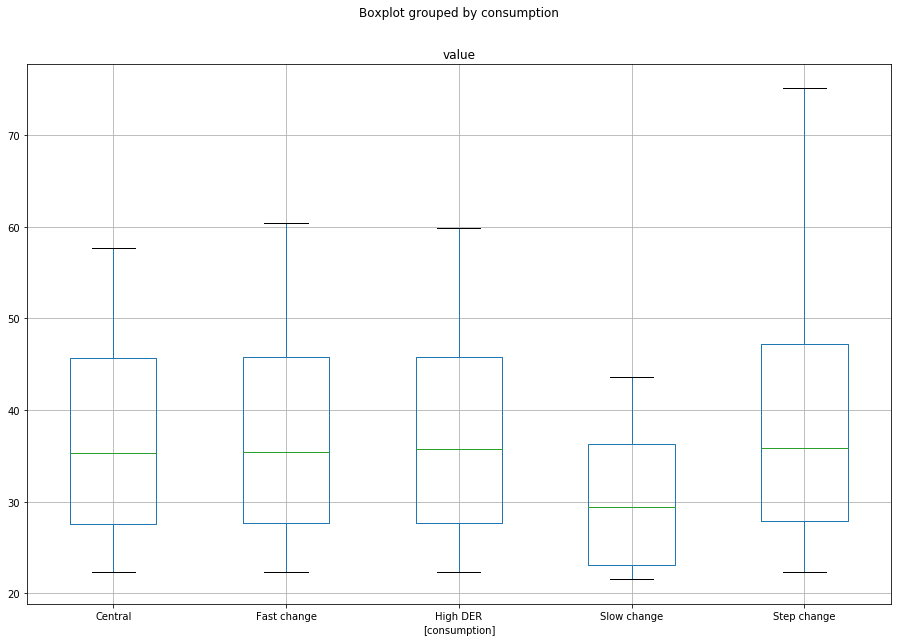

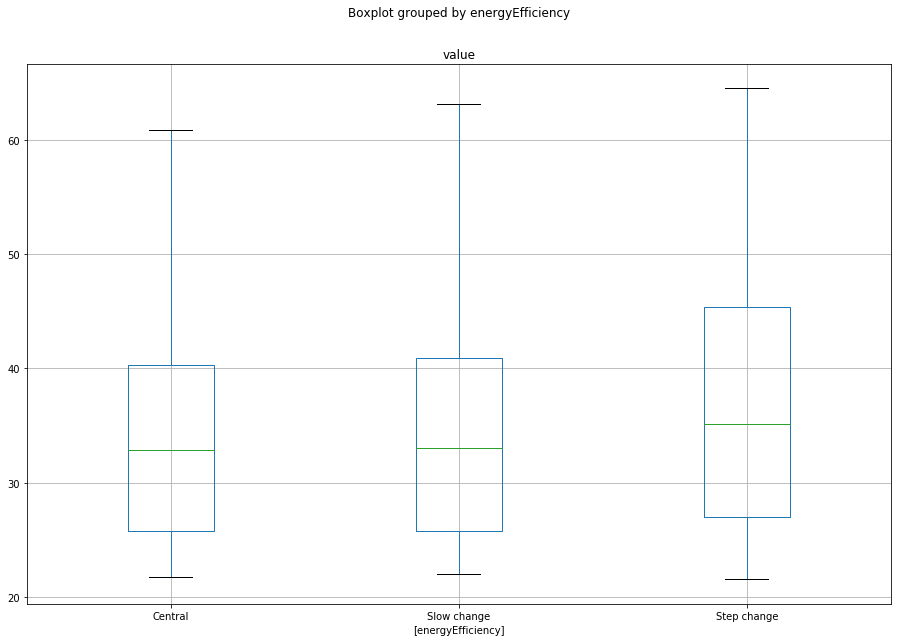

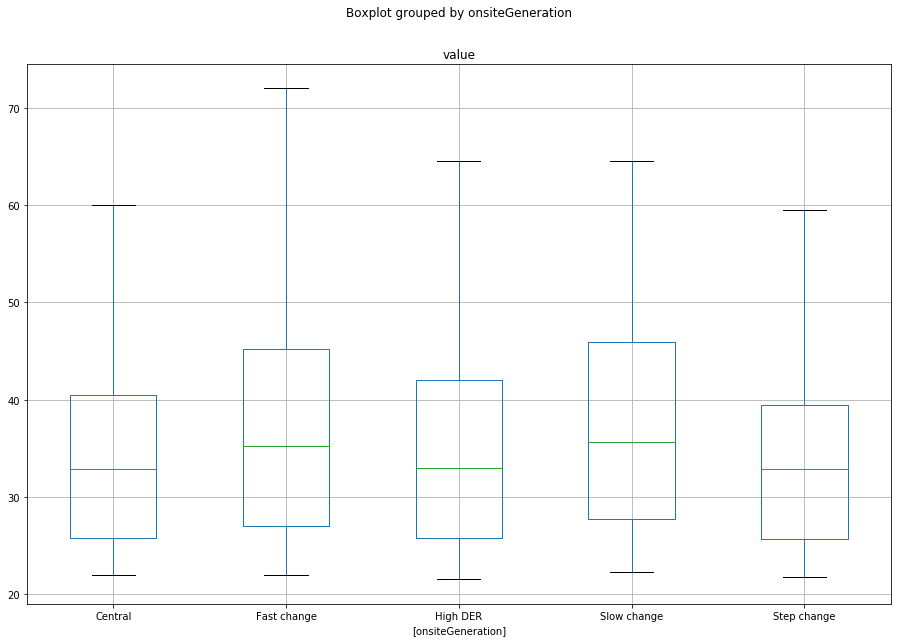

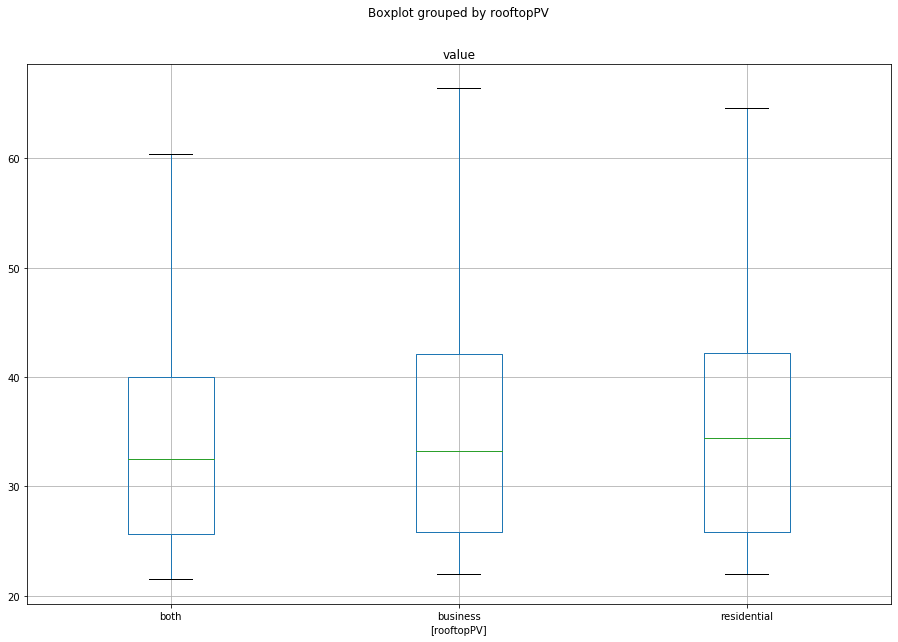

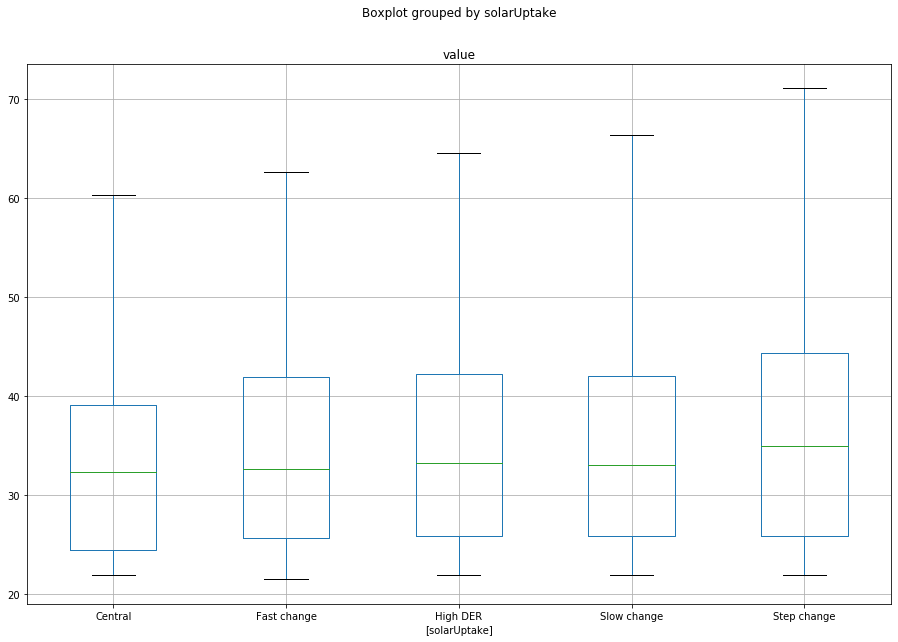

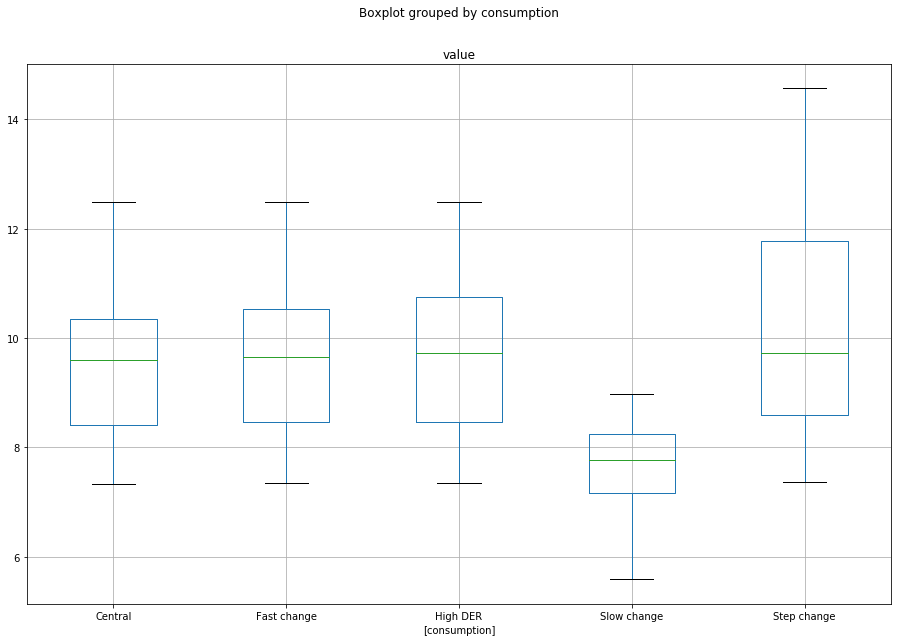

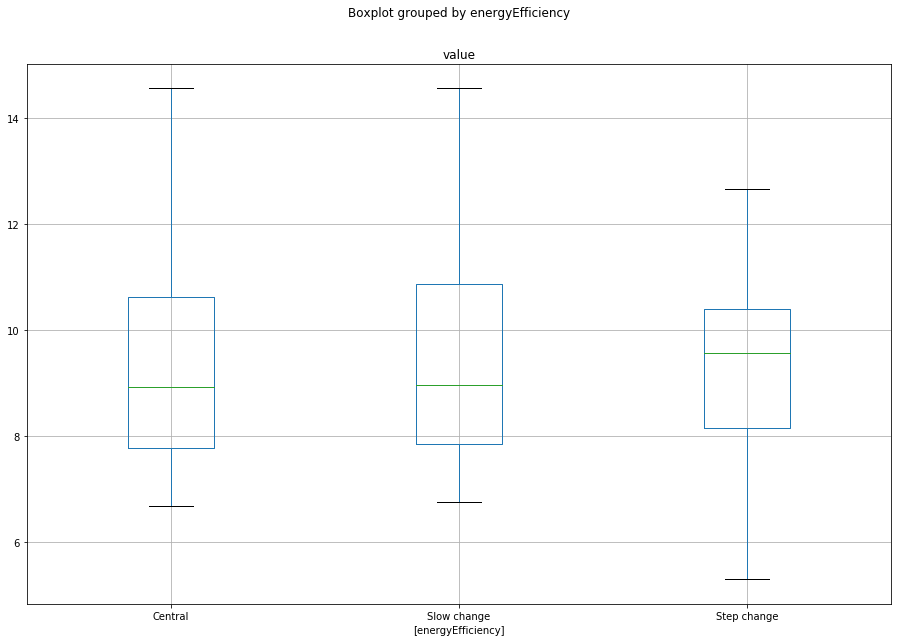

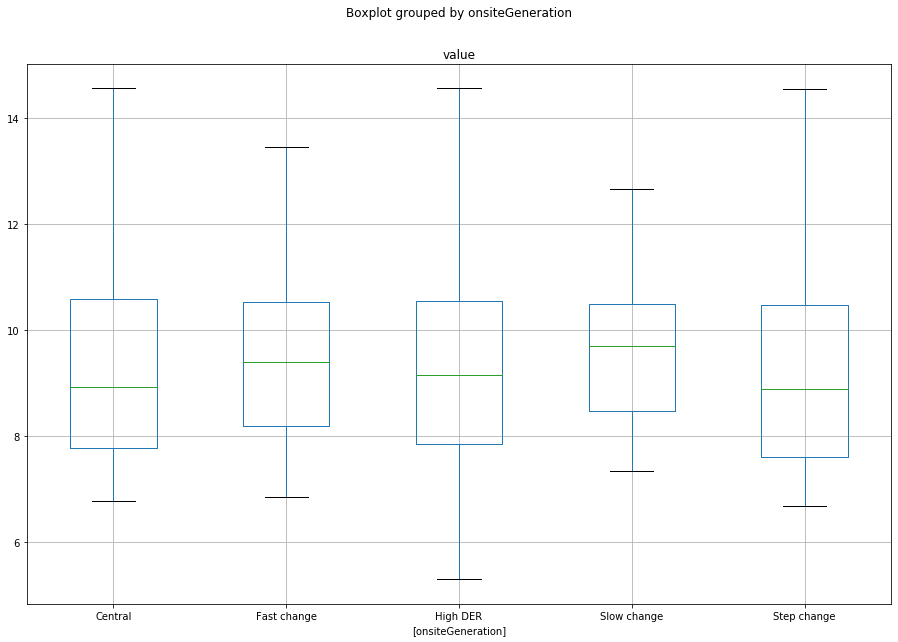

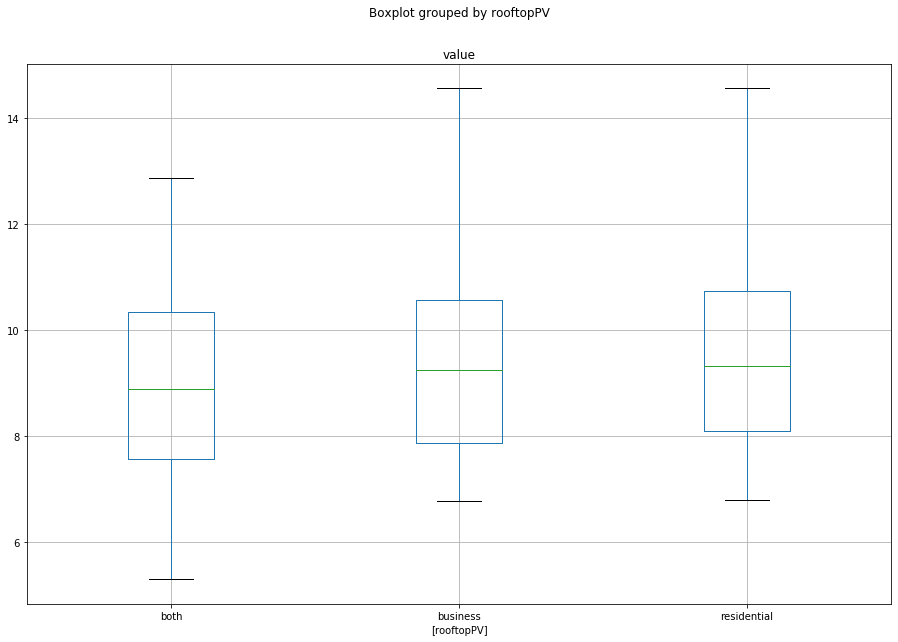

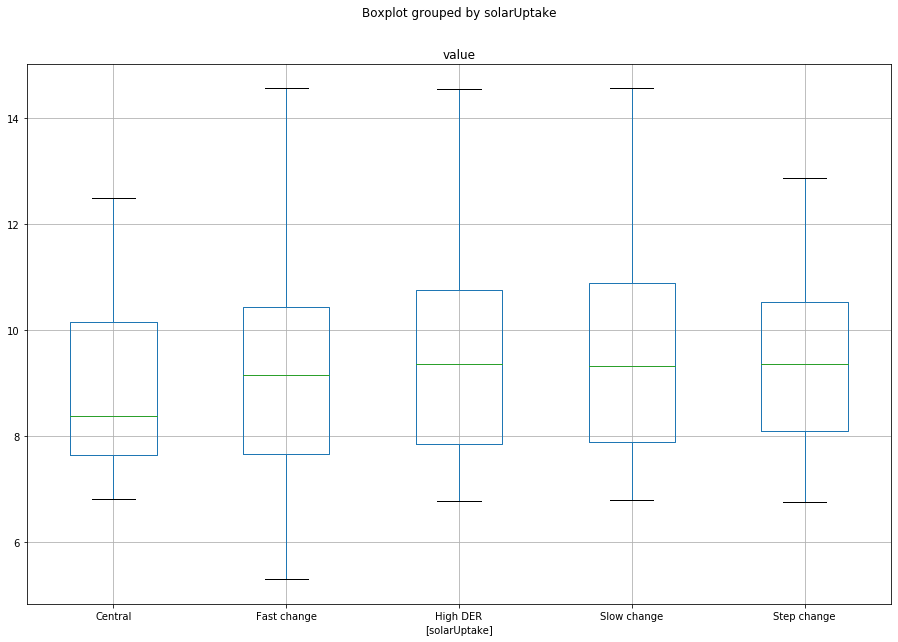

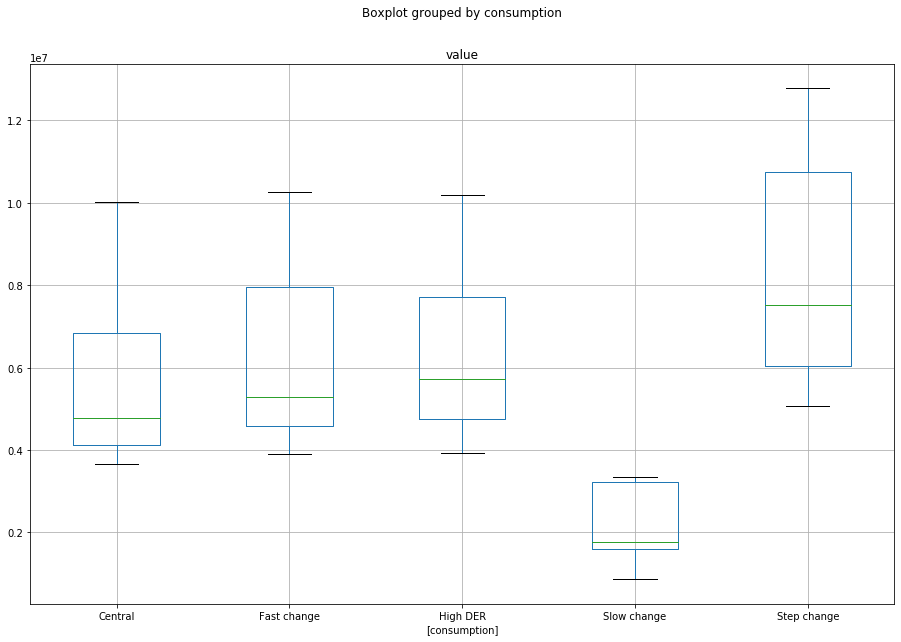

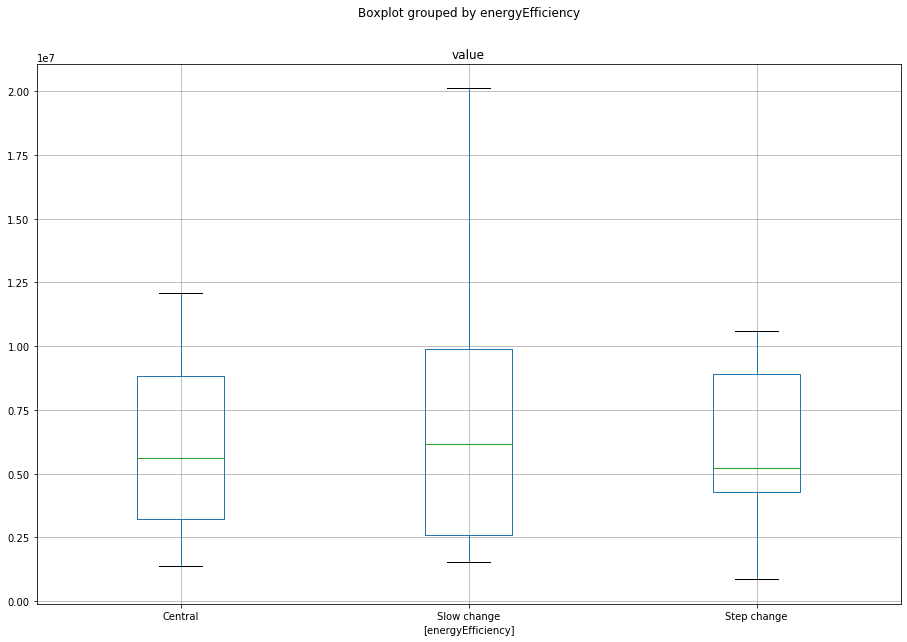

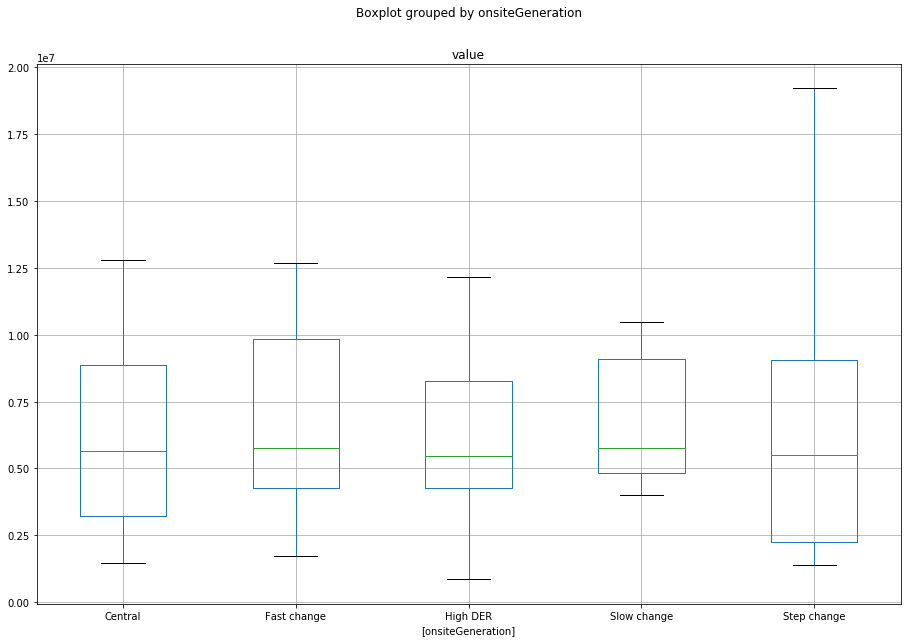

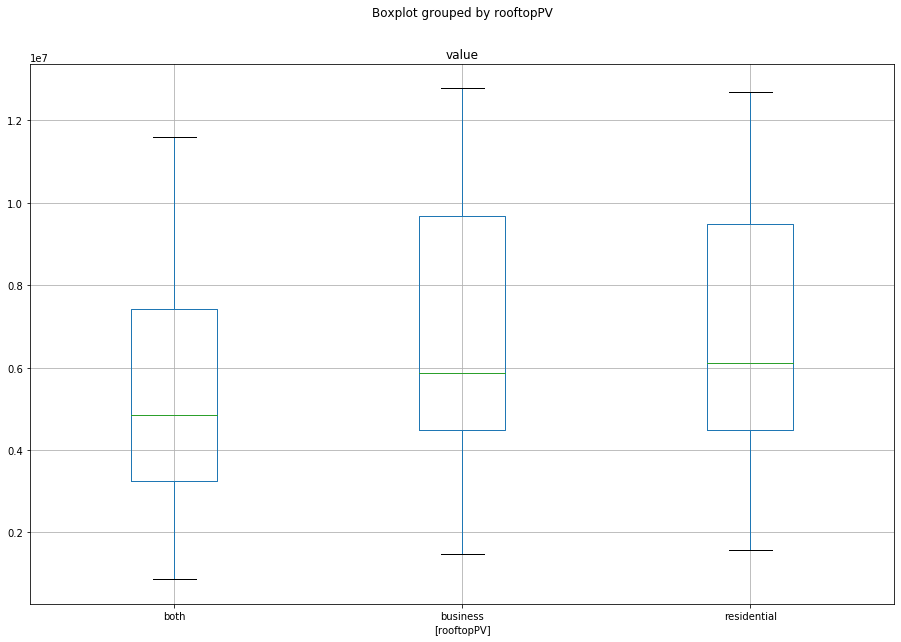

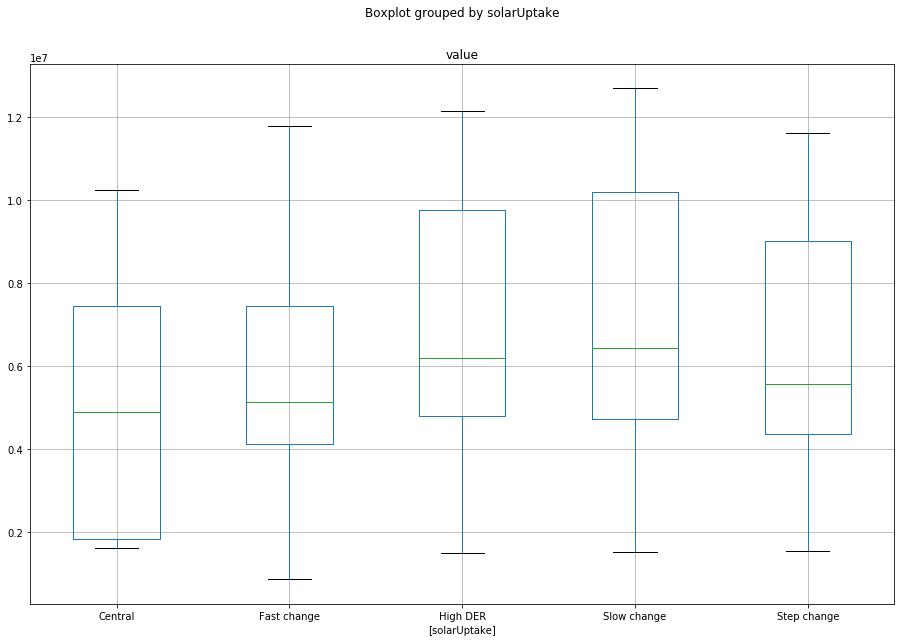

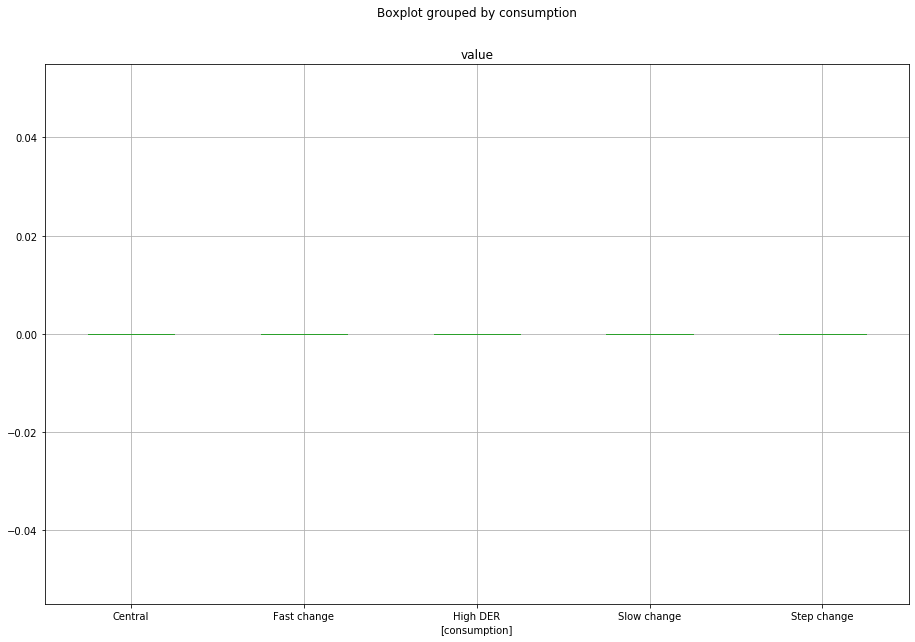

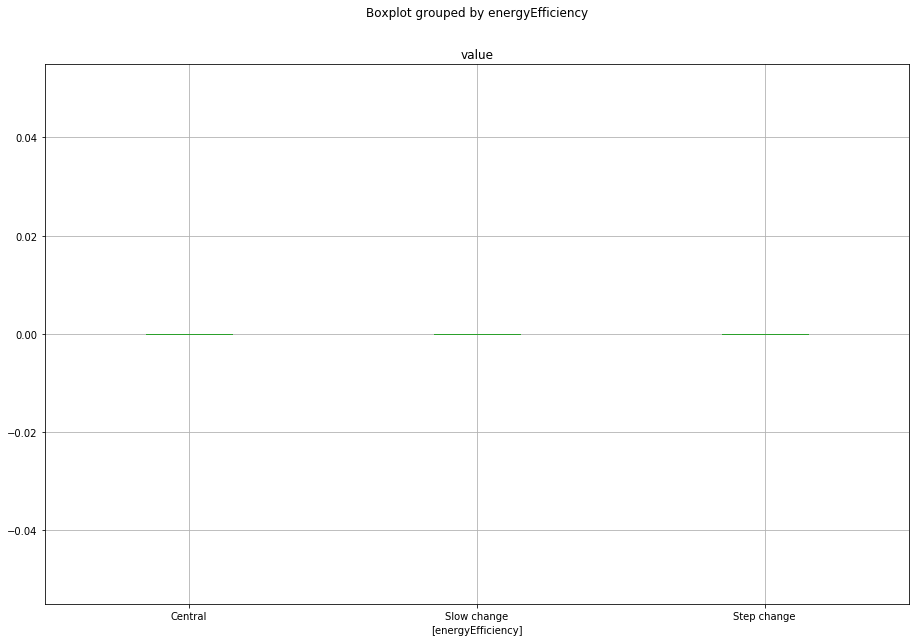

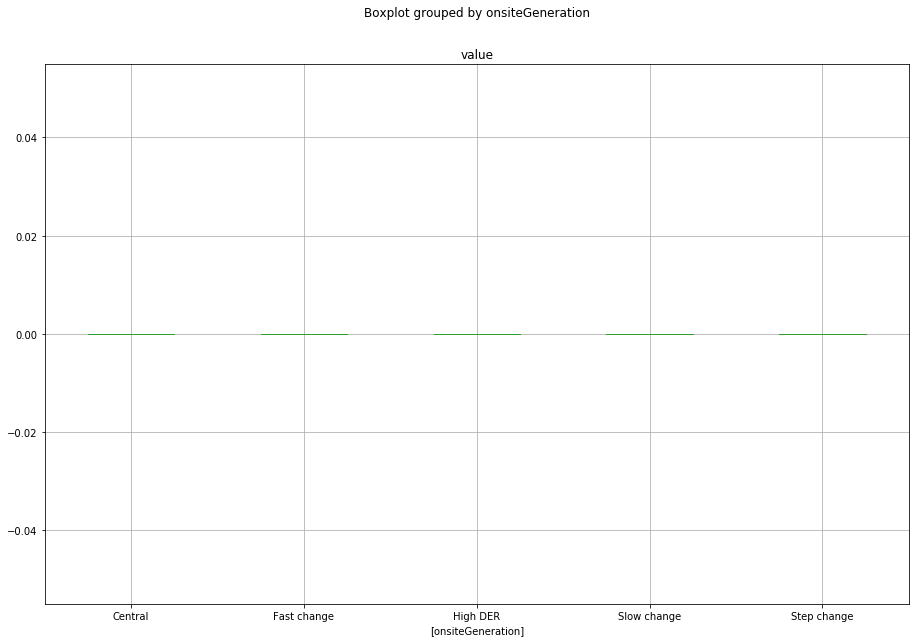

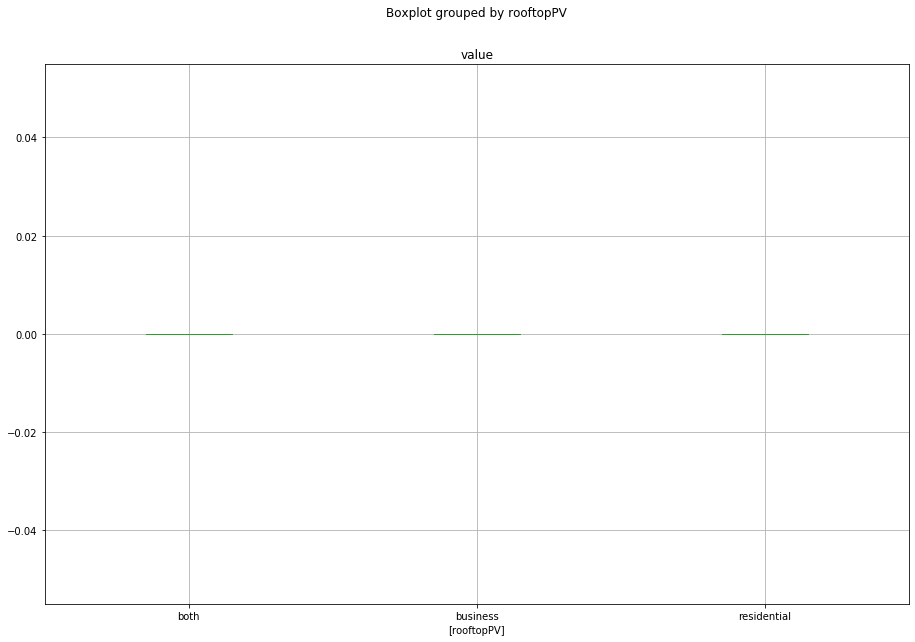

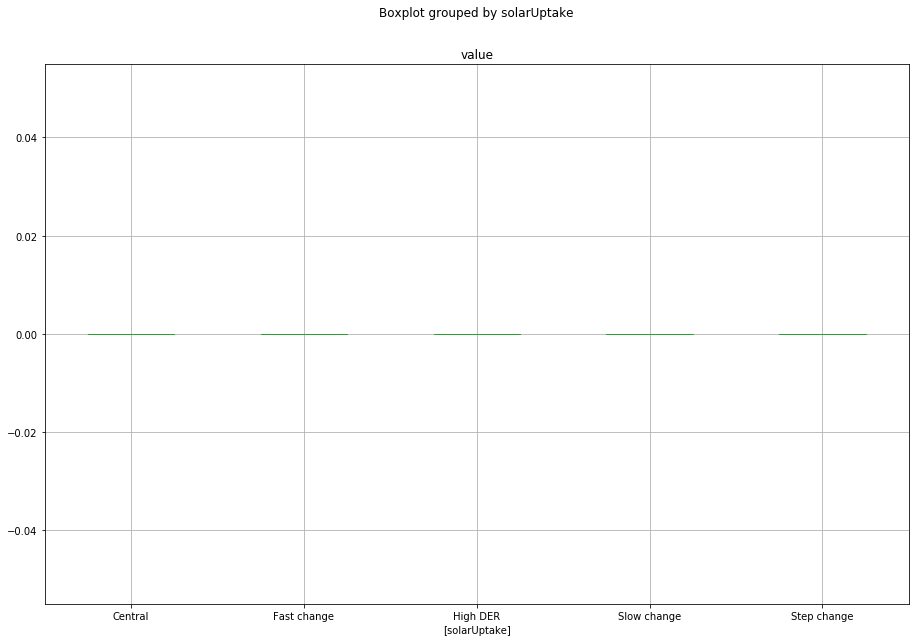

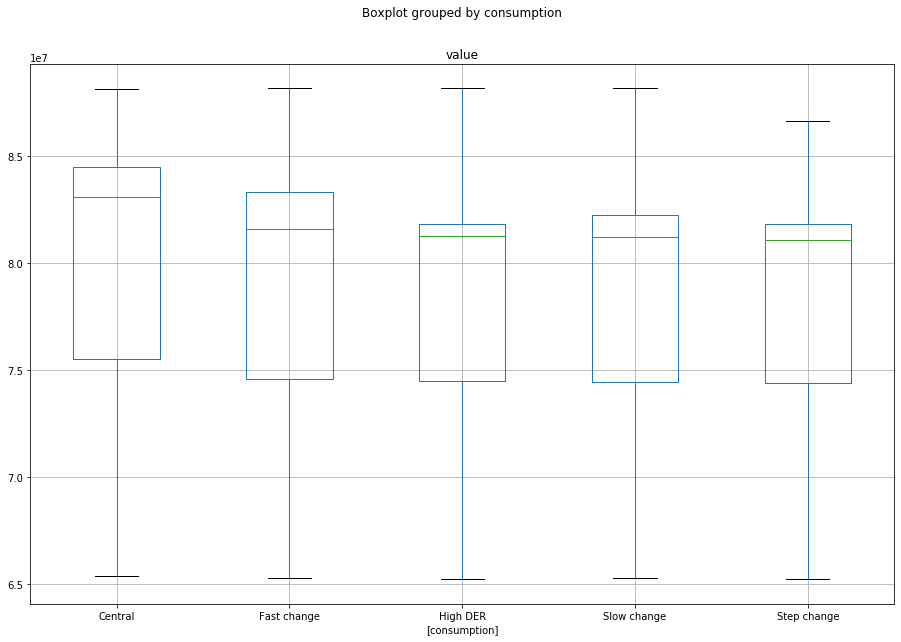

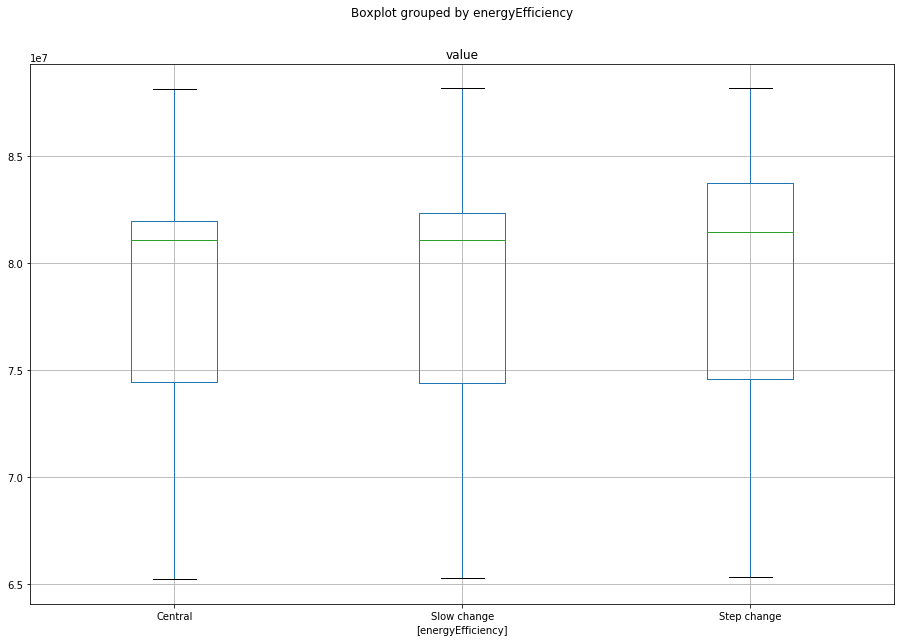

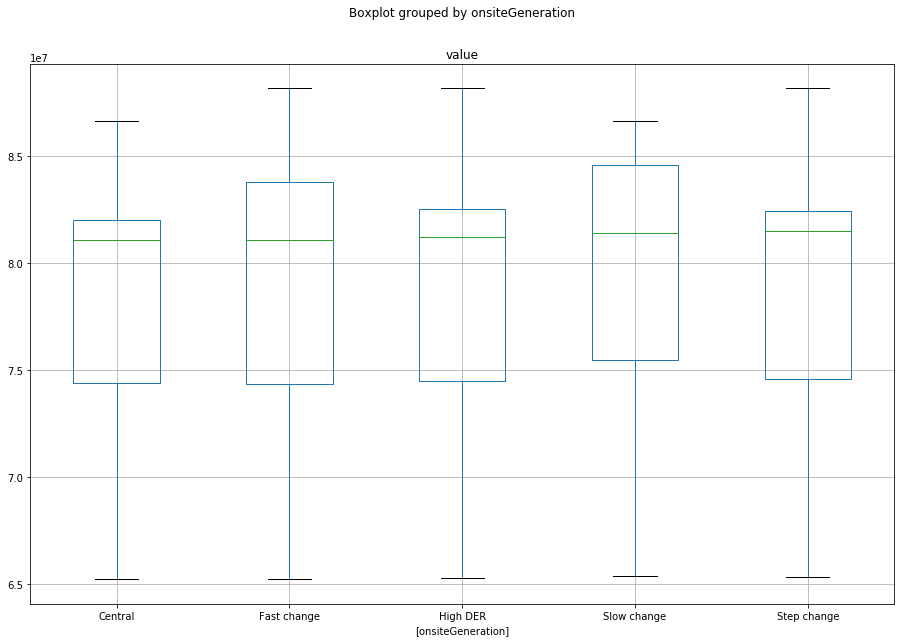

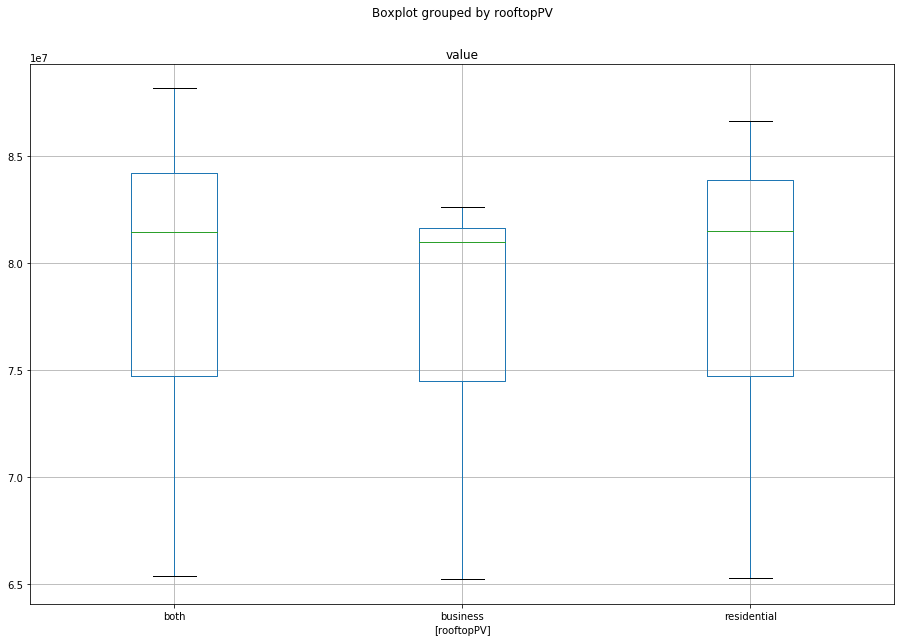

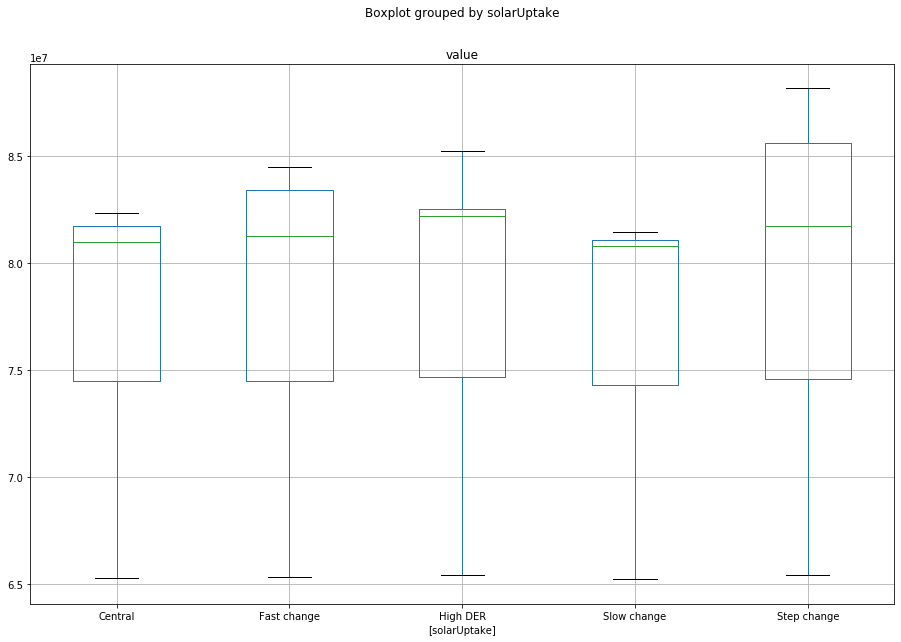

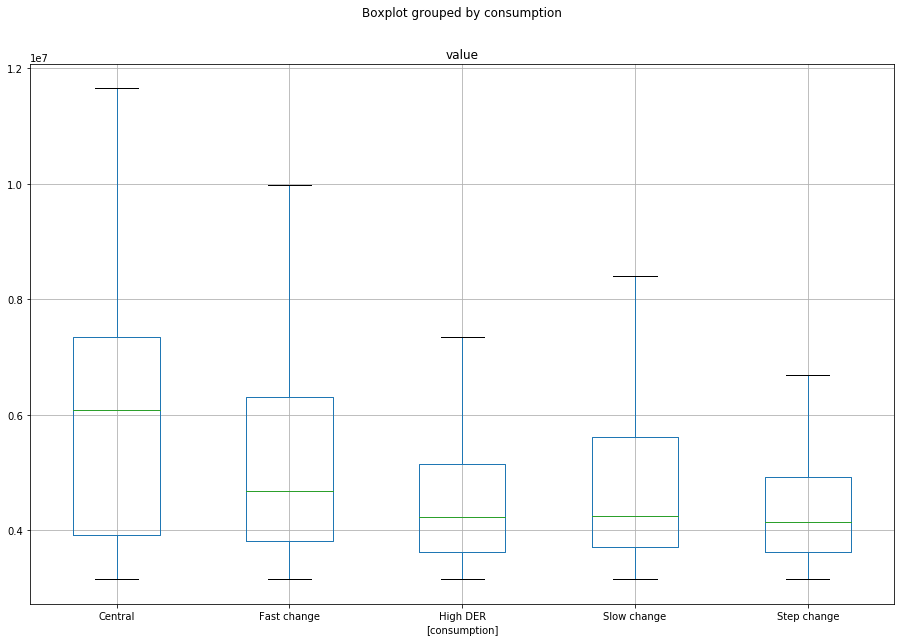

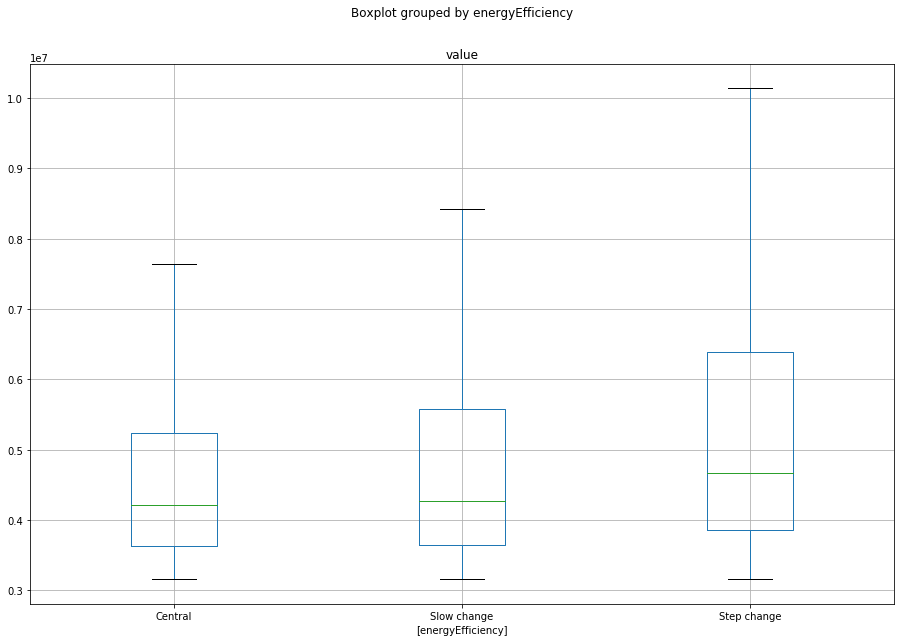

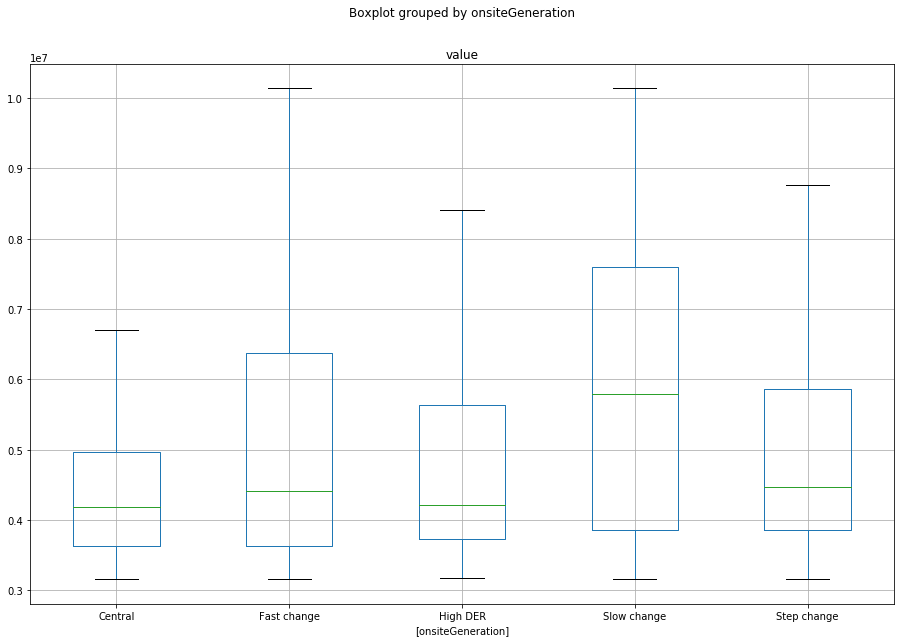

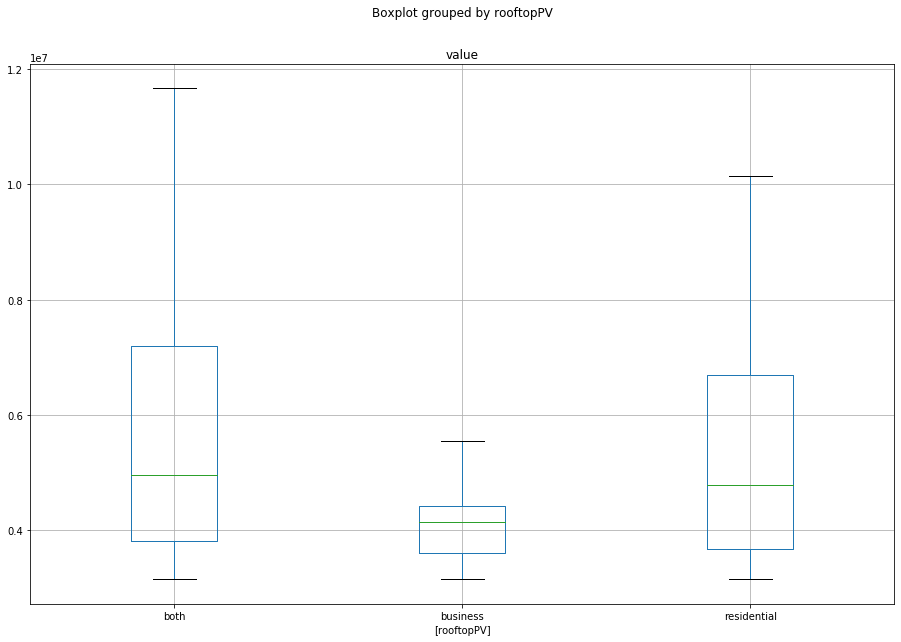

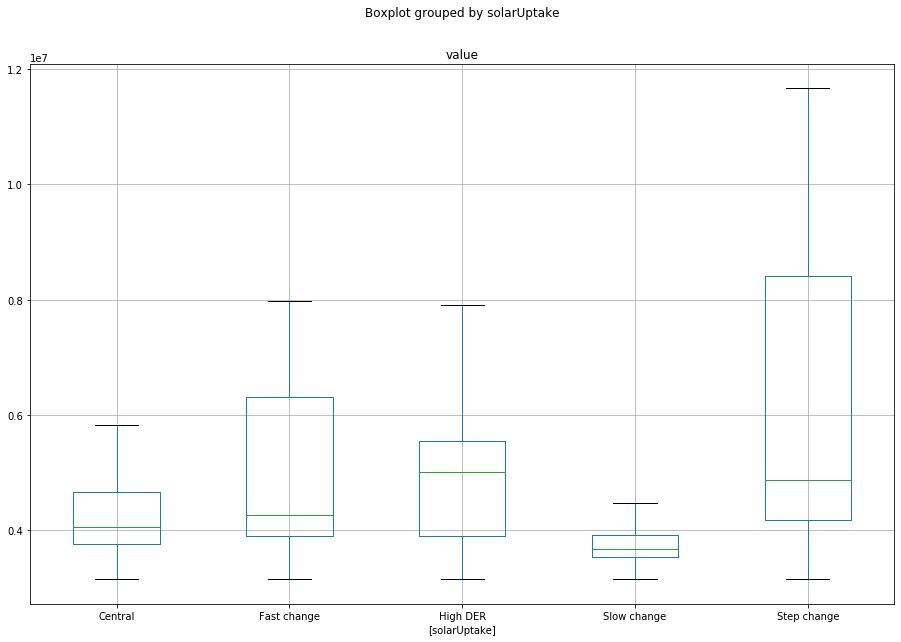

In [6]:
for ooi in outcomes_to_swow:
    data = outcomes[ooi][:, startYearShift:]
    
    dfBoxPlot = pd.DataFrame(index = index, data = data.T,columns=[ experiments[l] for l in levers])
    dfMeltdfBoxPlot = pd.melt(dfBoxPlot)
    #dfMeltdfBoxPlot.rename(columns={"value":ooi})
    
    for l in levers:
        ax = dfMeltdfBoxPlot.boxplot(by=l, meanline=True, showmeans=False, showcaps=True, 
                        showbox=True, showfliers=False, return_type='axes', figsize=(15, 10))
        
        
        plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\notebookGr4sp\\figs', '_boxplots_%s_%s'%(ooi,l)), 
                     dpi=300, bbox_inches='tight')
        
       
        plt.show()
        plt.close()


In [7]:
### Changes on different wholesale prices with different policies applied to the consumption lever over time.

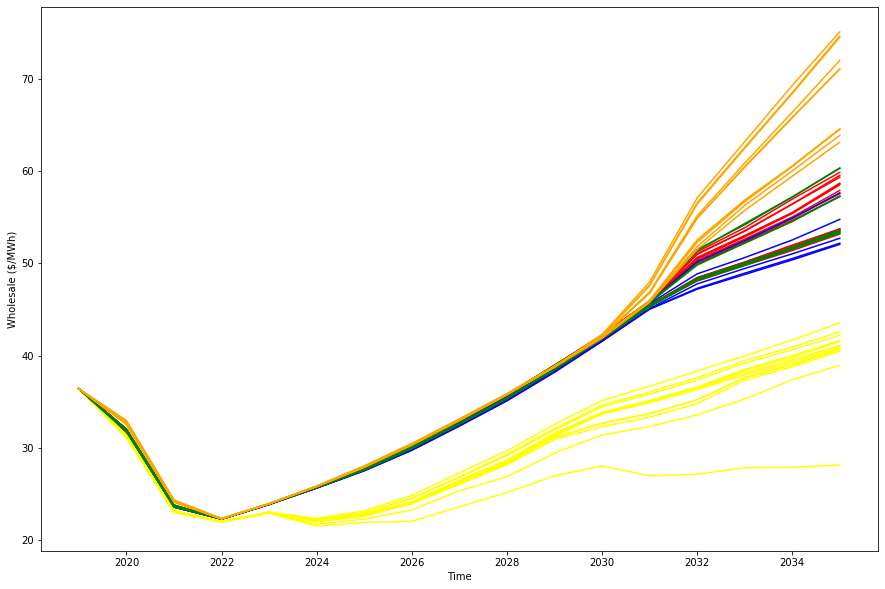

In [9]:
from ema_workbench.analysis.plotting_util import get_color, COLOR_LIST
from ema_workbench.analysis.plotting import lines

experiments, outcomes = results

startYear = 2019 
startYearShift = (startYear - 1998)
#startYearShift = (startYear - 1998) * 12

ooi = 'wholesalePriceYear'

data = outcomes[ooi]

consumption_list = ['Central', 'Slow change', 'Fast change', 'Step change', 'High DER']

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)
df_concat = pd.concat([exp, out], axis=1)

time = outcomes['TIMEYear'][0, startYearShift:]
index = pd.to_datetime(time, format = '%Y')
#index = pd.to_datetime(time, format = '%Y-%m-%d')


f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments['consumption'].str.count("High DER").sum() ):
    
    truncated_outcomes_0 = out[exp['consumption'] == "High DER"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_0, color = 'red')

for i in range( experiments.consumption.str.count("Central").sum() ):    
    truncated_outcomes_1 = out[exp['consumption'] == "Central"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.consumption.str.count("Slow change").sum() ):
    truncated_outcomes_2 = out[exp['consumption'] == "Slow change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')

for i in range( experiments.consumption.str.count("Fast change").sum() ):
    truncated_outcomes_3 = out[exp['consumption'] == "Fast change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_3, color = 'green')

for i in range( experiments.consumption.str.count("Step change").sum() ):
    truncated_outcomes_4 = out[exp['consumption'] == "Step change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_4, color = 'orange')

ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
#leg = ax.legend();
               
        
plt.show()


In [10]:
exp_sorted = exp.sort_values(['consumption', 'energyEfficiency', 'onsiteGeneration', 'rooftopPV', 'solarUptake']).set_index(['consumption', 'energyEfficiency', 'onsiteGeneration', 'rooftopPV', 'solarUptake' ])
exp_sorted.head()


scenario  \
consumption energyEfficiency onsiteGeneration rooftopPV   solarUptake            
Central     Central          Step change      both        Step change     None   
            Slow change      High DER         residential Fast change     None   
            Step change      Fast change      both        Fast change     None   
                                              residential Step change     None   
                             Slow change      both        Slow change     None   

                                                                      policy  \
consumption energyEfficiency onsiteGeneration rooftopPV   solarUptake          
Central     Central          Step change      both        Step change      2   
            Slow change      High DER         residential Fast change     40   
            Step change      Fast change      both        Fast change     21   
                                              residential Step change      7   
                             Slow change      both        Slow change     11   

                                                                       model  
consumption energyEfficiency onsiteGeneration rooftopPV   solarUptake         
Central     Central          Step change      both        Step change  Gr4sp  
            Slow change      High DER         residential Fast change  Gr4sp  
            Step change      Fast change      both        Fast change  Gr4sp  
                                              residential Step change  Gr4sp  
                             Slow change      both        Slow change  Gr4sp

### Changes on wholesale prices from different policies applied to the onsiteGeneration lever over time.

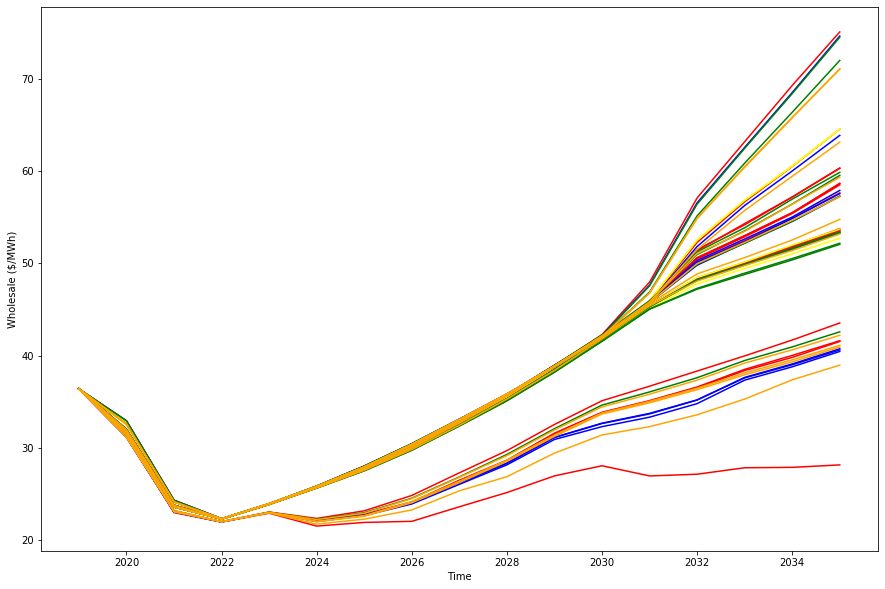

In [11]:

f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments.onsiteGeneration.str.count("High DER").sum() ):
    
    truncated_outcomes_0 = out[exp['onsiteGeneration'] == "High DER"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_0, color = 'red')

for i in range( experiments.onsiteGeneration.str.count("Central").sum() ):    
    truncated_outcomes_1 = out[exp['onsiteGeneration'] == "Central"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.onsiteGeneration.str.count("Slow change").sum() ):
    truncated_outcomes_2 = out[exp['onsiteGeneration'] == "Slow change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')

for i in range( experiments.onsiteGeneration.str.count("Fast change").sum() ):
    truncated_outcomes_3 = out[exp['onsiteGeneration'] == "Fast change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_3, color = 'green')

for i in range( experiments.onsiteGeneration.str.count("Step change").sum() ):
    truncated_outcomes_4 = out[exp['onsiteGeneration'] == "Step change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_4, color = 'orange')

ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
               
plt.show()



### Changes on wholesale prices from different policies applied to the energyEffciency lever over time.

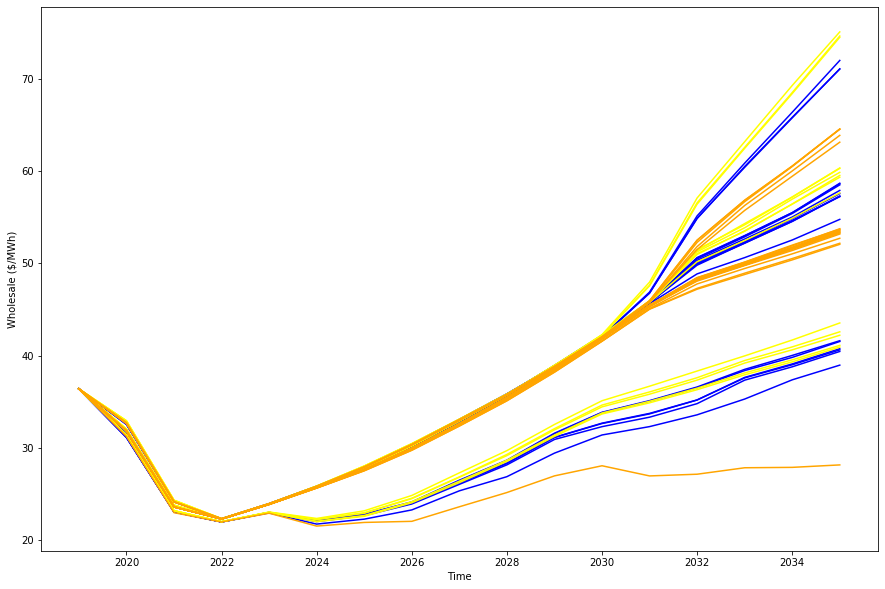

In [12]:

f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments.energyEfficiency.str.count("Central").sum() ):    
    truncated_outcomes_1 = out[exp['energyEfficiency'] == "Central"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.energyEfficiency.str.count("Slow change").sum() ):
    truncated_outcomes_2 = out[exp['energyEfficiency'] == "Slow change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')

for i in range( experiments.energyEfficiency.str.count("Step change").sum() ):
    truncated_outcomes_4 = out[exp['energyEfficiency'] == "Step change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_4, color = 'orange')

ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
               
plt.show()



### Changes on wholesale prices from different policies applied to the rooftopPV lever over time.

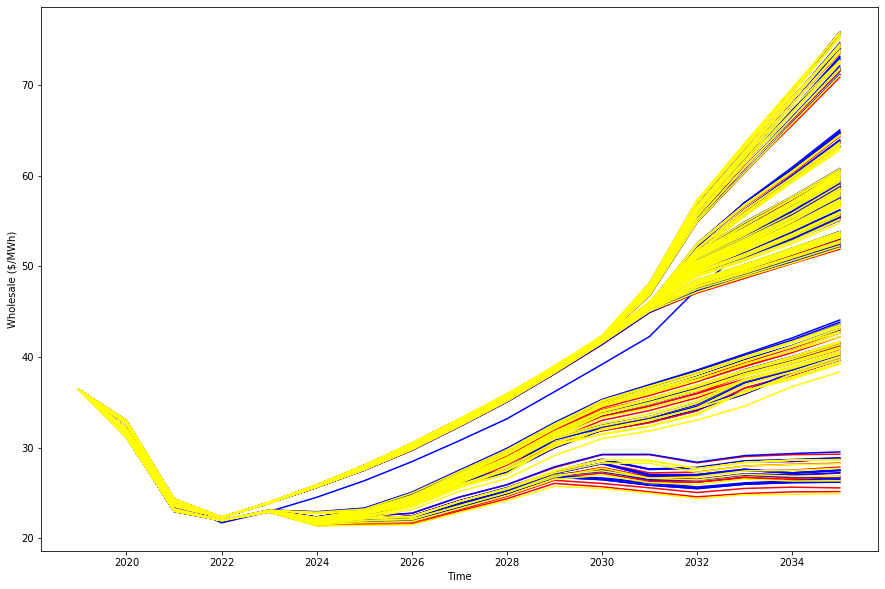

In [26]:

f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments.rooftopPV.str.count("residential").sum() ):
    
    truncated_outcomes_0 = out[exp['rooftopPV'] == "residential"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_0, color = 'red')

for i in range( experiments.rooftopPV.str.count("business").sum() ):    
    truncated_outcomes_1 = out[exp['rooftopPV'] == "business"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.rooftopPV.str.count("both").sum() ):
    truncated_outcomes_2 = out[exp['rooftopPV'] == "both"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')


ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
               
plt.show()


### Changes on wholesale prices from different policies applied to the solarUptake lever over time.

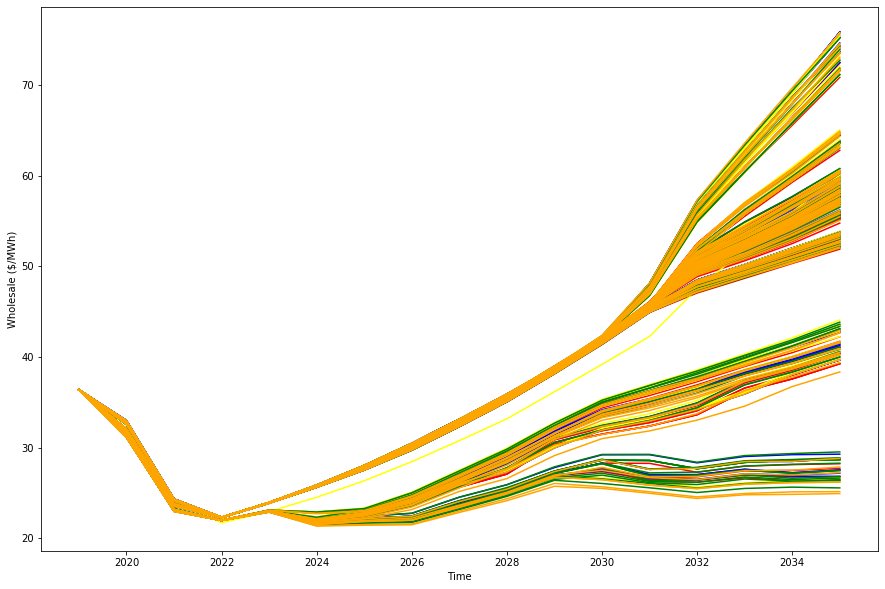

In [27]:

f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments.solarUptake.str.count("High DER").sum() ):
    
    truncated_outcomes_0 = out[exp['solarUptake'] == "High DER"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_0, color = 'red')

for i in range( experiments.solarUptake.str.count("Central").sum() ):    
    truncated_outcomes_1 = out[exp['solarUptake'] == "Central"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.solarUptake.str.count("Slow change").sum() ):
    truncated_outcomes_2 = out[exp['solarUptake'] == "Slow change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')

for i in range( experiments.solarUptake.str.count("Fast change").sum() ):
    truncated_outcomes_3 = out[exp['solarUptake'] == "Fast change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_3, color = 'green')

for i in range( experiments.solarUptake.str.count("Step change").sum() ):
    truncated_outcomes_4 = out[exp['solarUptake'] == "Step change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_4, color = 'orange')

ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
               
plt.show()



In [ ]:
f, ax = plt.subplots(figsize=(15, 10))  

for i in range( experiments.consumption.str.count("High DER").sum() ):
    
    truncated_outcomes_0 = out[exp['onsiteGeneration'] == "High DER"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_0, color = 'red')

for i in range( experiments.onsiteGeneration.str.count("Central").sum() ):    
    truncated_outcomes_1 = out[exp['onsiteGeneration'] == "Central"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_1, color = 'blue')

for i in range( experiments.onsiteGeneration.str.count("Slow change").sum() ):
    truncated_outcomes_2 = out[exp['onsiteGeneration'] == "Slow change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_2, color = 'yellow')

for i in range( experiments.onsiteGeneration.str.count("Fast change").sum() ):
    truncated_outcomes_3 = out[exp['onsiteGeneration'] == "Fast change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_3, color = 'green')

for i in range( experiments.onsiteGeneration.str.count("Step change").sum() ):
    truncated_outcomes_4 = out[exp['onsiteGeneration'] == "Step change"].values[i, startYearShift:]
    sns.lineplot(x=index, y=truncated_outcomes_4, color = 'orange')

ax.set_xlabel ("Time")
ax.set_ylabel ("Wholesale ($/MWh)")
               
plt.show()


In [19]:
### Group by policies 

In [30]:


experiments, outcomes = results

ooi = 'wholesalePriceYear'
data = outcomes[ooi] 

# # tech_list = ['Central', 'ICE', 'carshare', 'publictransport'] 
# # time_list = [10, 20, 30, 40, 49]  
# 
# exp = pd.DataFrame(experiments)
# out = pd.DataFrame(data)
# 
# ooi_results=[]
# df_kde_list=[]
# 
# for time in time_list:
#     for i, tech in enumerate(tech_list):        
#         truncated_outcomes = out[exp['policy'] == tech].values
#         size = len(truncated_outcomes[:,time])
#         df_kde_list.append(pd.DataFrame({'Share_of_supporter': truncated_outcomes[:, time].tolist(),
#                                    'Technology':[tech]*size}, index=range(size)))
#         
#     df_kde=pd.concat(df_kde_list[i] for i in range(len(tech_list)))
#     ooi_results.append(df_kde)
#     
# df_kde.Share_of_supporter
        
#ooi_results[2].Share_of_supporter[ooi_results[2].Technology == 'publictransport']

In [31]:
time

40

In [32]:
outcomes['wholesalePriceYear']

array([[ 0.        , 25.14046462, 35.94871298, ..., 25.96118967,
        26.14340242, 26.19101671],
       [ 0.        , 25.14046462, 35.94871298, ..., 49.00467046,
        50.59175809, 52.26454512],
       [ 0.        , 25.14046462, 35.94871298, ..., 61.428895  ,
        66.9948101 , 72.71897602],
       ...,
       [ 0.        , 25.14046462, 35.94871298, ..., 49.98256842,
        51.73223623, 53.55150191],
       [ 0.        , 25.14046462, 35.94871298, ..., 38.51860332,
        39.94587898, 41.55348253],
       [ 0.        , 25.14046462, 35.94871298, ..., 54.45267455,
        57.46856499, 60.49302038]])

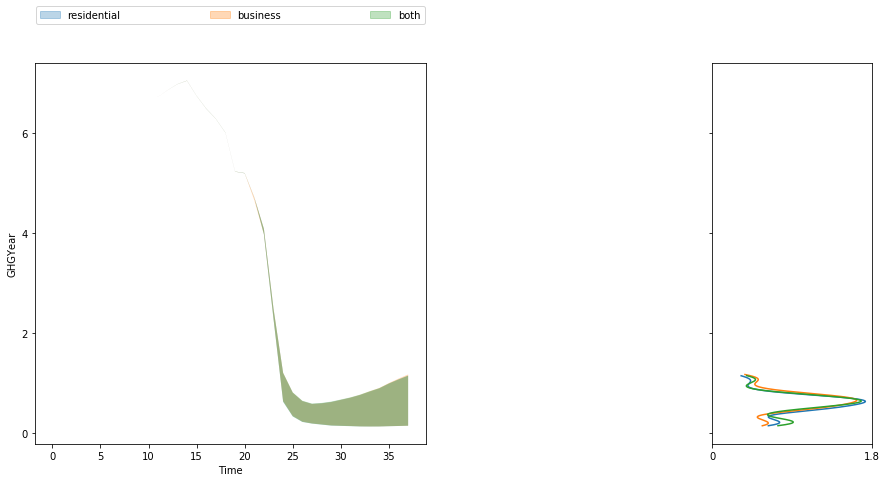

In [33]:
%matplotlib inline

from ema_workbench.analysis.plotting import envelopes
from ema_workbench.analysis.plotting_util import Density 


grid = plt.GridSpec(1, 6, wspace=0.2, hspace=0.3, width_ratios=[60,10,10,10,10,10])

#Create envelope plot
ooi = 'GHGYear'

# group_by='rooftopPV', density = Density.KDE, grouping_specifiers={'residential', 'business', 'both'}
# group_by='onsiteGeneration', density = Density.KDE, grouping_specifiers={'Central', 'Slow change', 'Fast change', 'Step change', 'High DER'}

ax_env = envelopes(experiments, outcomesYear, outcomes_to_show = ooi, group_by='rooftopPV', density = Density.KDE, grouping_specifiers={'residential', 'business', 'both'} , 
                   titles={ooi},
          ylabels={ooi: ooi}, legend=True, fill=True)

#Assign created plot to the grid space        
ax_env[1][ooi].set_position(grid[0].get_position(ax_env[0]))

# data = outcomes[ooi] 

# #tech_list = ['hybrid', 'ICE', 'bev', 'publictransport', 'carshare', 'slowmodes'] 
# consumption_list = ['Central', 'Slow change', 'Fast change', 'Step change', 'High DER']
# time_list = [0, int(time.size/4), int(time.size/2), int(time.size/1.5) ,time.size - 1]  

# exp = pd.DataFrame(experiments)
# out = pd.DataFrame(data)

# ooi_results=[]

# for t in time_list:
#     df_kde_list=[]
#     for i, consumption in enumerate(consumption_list):        
#         truncated_outcomes = out[exp['consumption'] == consumption].values
#         #print (time_list, consumption, t, len(truncated_outcomes[0,:]), len(truncated_outcomes[1,:]) )        
#         size = len(truncated_outcomes[:,t])
#         df_kde_list.append(pd.DataFrame({'Share_of_wholesale': truncated_outcomes[:, t].tolist(),
#                                    'Consumption':[consumption]*size}, index=range(size)))
        
#     df_kde=pd.concat(df_kde_list[i] for i in range(len(consumption_list)))
#     ooi_results.append(df_kde)
    


# #create and assign KDEs with shared axis to grid cells
# ax_kde = []
# ax_kde.append(plt.subplot(grid[1]))
# for i, val in enumerate([2,3,4,5]): 
#     ax_kde.append(plt.subplot(grid[val], sharey=ax_kde[0]))
#     ax_kde[i+1].set_yticklabels([])
#     ax_kde[i+1].set_ylim([0, 1])
    
    
    
# # for j, val in enumerate(time_list):
# #     sns.kdeplot(ooi_results[j].Share_of_wholesale[ooi_results[j].Consumption == 'Central'],
# #                 label='Central', color='goldenrod', legend=False, vertical=True, ax=ax_kde[j])
# #     sns.kdeplot(ooi_results[j].Share_of_wholesale[ooi_results[j].Consumption == 'Slow change'],
# #                 label='SlowChange', color='green', legend=False, vertical=True, ax=ax_kde[j])
# #     sns.kdeplot(ooi_results[j].Share_of_wholesale[ooi_results[j].Consumption == 'Step change'],
# #                 label='StepChange', color='mediumpurple', legend=False, vertical=True, ax=ax_kde[j])
# #     sns.kdeplot(ooi_results[j].Share_of_wholesale[ooi_results[j].Consumption == 'Fast change'],
# #                 label='FastChange', color='hotpink', legend=False, vertical=True, ax=ax_kde[j])
# #     sns.kdeplot(ooi_results[j].Share_of_wholesale[ooi_results[j].Consumption == 'High DER'],
# #                 label='HighDER', color='lightskyblue', legend=False, vertical=True, ax=ax_kde[j])
# #     ax_kde[j].annotate('Timestep=' + str(val) , xycoords='axes fraction' , textcoords='axes fraction', xy=(.02, 1.03), xytext=(.02, 1.03), size=10)


# #Configure the figure size        
ax_env[0].set_size_inches(15, 7)

ax_env[1][ooi].locator_params(nbins=6, axis='y')
    
# for i in range(5):
#     ax_kde[i].xaxis.set_major_locator(plt.MaxNLocator(3))

# ax_kde[0].set_xlim(0, 10)
# ax_kde[1].set_xlim(0, 12)
# ax_kde[2].set_xlim(0, 20)
# ax_kde[3].set_xlim(0, 15)
# ax_kde[4].set_xlim(0, 15)


# '''ax_kde[0].legend(bbox_to_anchor=(0., 1.02, 5.8, .102), loc=3,
#            ncol=5, mode="expand", borderaxespad=0) '''

# ax_kde[2].text( 2, -.08, 'Density', ha='center', fontsize=10)

plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\notebookGr4sp\\figs', '_envelope_kdes_%s_dir_unc_1'%(ooi)), 
            dpi=300, bbox_inches='tight')


In [24]:
df = pd.DataFrame(columns=['Position of supporter','statistics','time','practice dimension'])

mean_list = ['supporter_p0_mean', 'supporter_p1_mean', 
                       'supporter_p2_mean', 'supporter_p3_mean', 
                        'supporter_p4_mean', 'supporter_p5_mean',  
                       'supporter_p6_mean']
std_list = ['supporter_p0_StdDev', 'supporter_p1_StdDev', 
                       'supporter_p2_StdDev', 'supporter_p3_StdDev', 
                        'supporter_p4_StdDev', 'supporter_p5_StdDev',  
                       'supporter_p6_StdDev']

practice_dim = ['emissions', 'Cost', 'M private mobility', 
                'ICT',  'Build env', 'M public mobolity'
                ,'Conv.']

time_list = [10, 20, 30, 40, 49]

df_list = []

for i, mean in enumerate(mean_list):

    for time in time_list:
        
        size = outcomes[mean][:, time].shape[0]
        df_list.append(pd.DataFrame({'Position of supporter': outcomes[mean][:, time].tolist(),
                             'statistics':['Mean']*size, 
                             'time': [time]*size,
                             'practice dimension':[practice_dim[i]]*size}, index=range(size)))
        
for i, std in enumerate(std_list):

    for time in time_list:
        
        size = outcomes[std][:, time].shape[0]
        df_list.append(pd.DataFrame({'Position of supporter': outcomes[std][:, time].tolist(),
                             'statistics':['StdDev']*size, 
                             'time': [time]*size,
                             'practice dimension':[practice_dim[i]]*size}, index=range(size)))

df_results = pd.concat(df_list[i] for i in range(len(df_list)))

df0 = df_results[df_results['practice dimension'] == 'emissions']
df1 = df_results[df_results['practice dimension'] == 'Cost']
df2 = df_results[df_results['practice dimension'] == 'M private mobility']
df3 = df_results[df_results['practice dimension'] == 'ICT']
df4 = df_results[df_results['practice dimension'] == 'Build env']
df5 = df_results[df_results['practice dimension'] == 'M public mobolity']
df6 = df_results[df_results['practice dimension'] == 'Conv.']


KeyError: 'supporter_p0_mean'

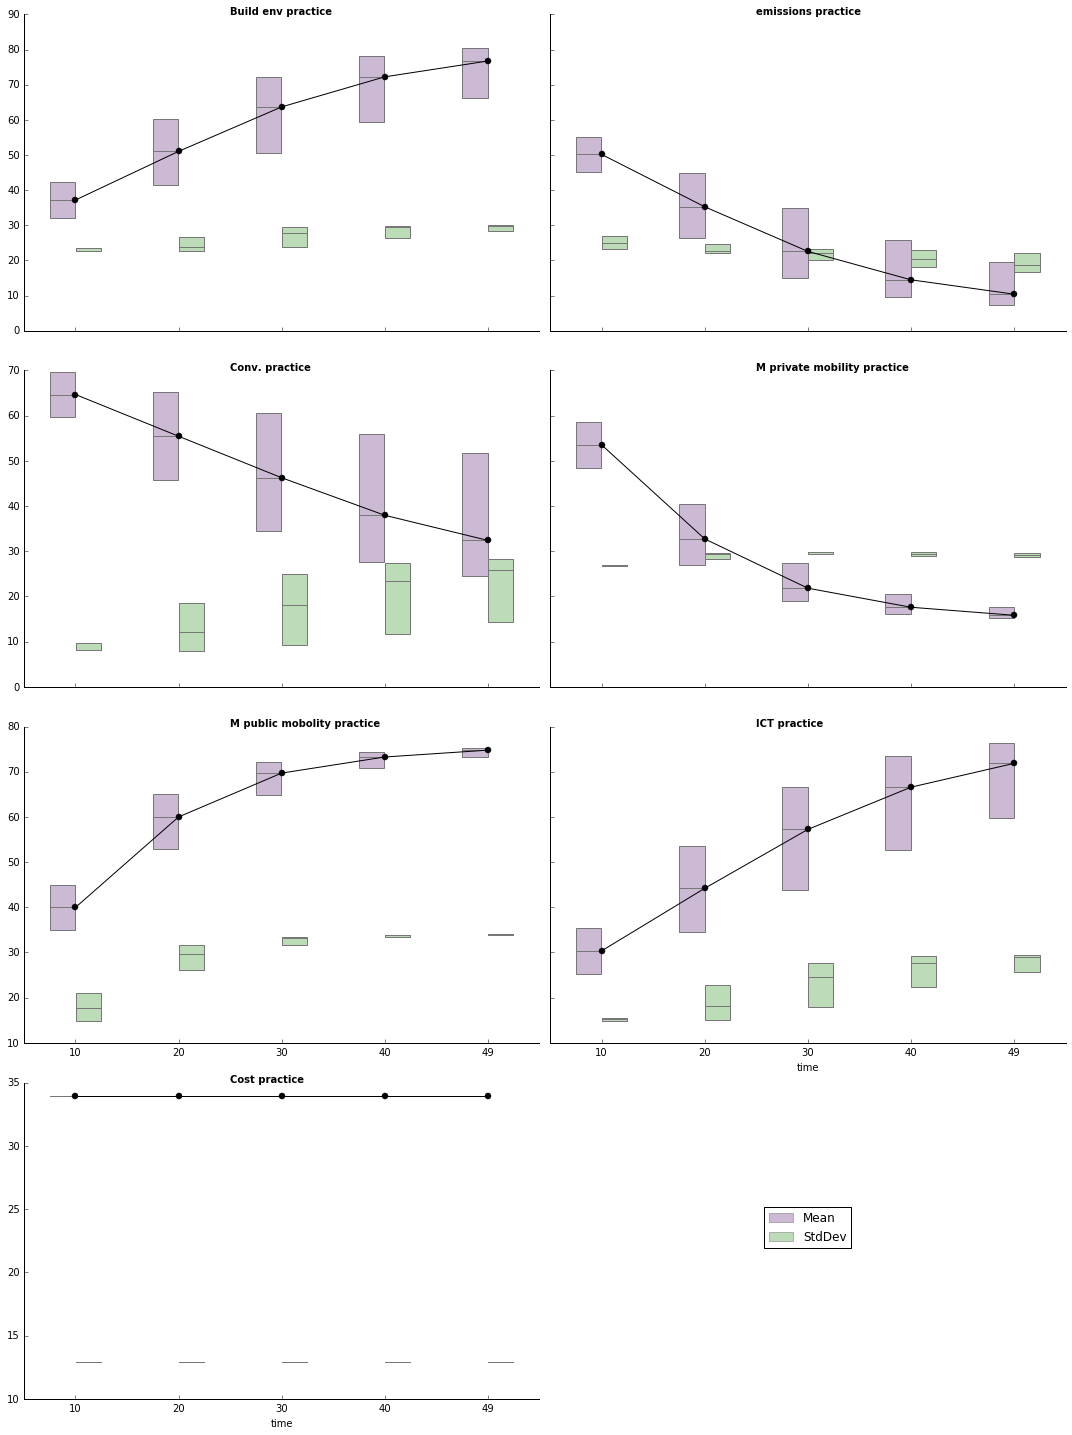

In [25]:
%matplotlib inline

import seaborn as sns

df_dict={'emissions':df0, 'Cost':df1, 'M private mobility': df2, 'ICT':df3, 'Build env':df4, 'M public mobolity':df5, 'Conv.':df6}



fig, ax = plt.subplots(4,2, figsize=(15,20), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

i = 0
j = 0
for dim, df in df_dict.items():

    sns.boxplot(x="time", y="Position of supporter", hue="statistics", data=df, whis='range', palette="PRGn", width = .5, showfliers=False, ax=ax[i,j])
    sns.despine(offset=0, trim=False, bottom=False)


    median_list_mean = []
    #median_list_std = []
    time_list = [10, 20, 30, 40, 49]

    for time in time_list:
        median_list_mean.append(np.median(df.loc[(df['time']==time) & (df['statistics']=='Mean'), "Position of supporter"]))
        #median_list_std.append(np.median(df.loc[(df0['time']==time) & (df['statistics']=='StdDev'), "Position of supporter"]))

    ax[i,j].plot(median_list_mean,'ko-',label='line1')
    
    ax[i,j].xaxis.label.set_visible(False)
    ax[i,j].yaxis.label.set_visible(False)

    lgd = ax[i,j].get_legend()
    lgd.set_visible(False)

    
    ax[i, j].annotate(dim + ' practice ' , xycoords='axes fraction' , textcoords='axes fraction', xy=(.4, 1), xytext=(.4, 1), size=10, weight='bold')
    
    
    i += 1
    if i == 4:
        i = 0
        j = 1 


    
plt.setp(ax[0,0].get_xticklabels(), visible=False)
plt.setp(ax[0,1].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_xticklabels(), visible=False)
plt.setp(ax[1,1].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_xticklabels(), visible=False)

plt.setp(ax[0,1].get_yticklabels(), visible=False)
plt.setp(ax[1,1].get_yticklabels(), visible=False)
plt.setp(ax[2,1].get_yticklabels(), visible=False)


ax[3,0].xaxis.label.set_visible(True)
ax[2,1].xaxis.label.set_visible(True)

handles, labels = ax[2,1].get_legend_handles_labels()

ax[2,1].legend(handles[1:3], labels[1:3], bbox_to_anchor=(.5, -.5), loc='upper center')

fig.delaxes(ax[3,1])
fig.tight_layout()
        
fig.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_boxplots_supporter_unc'), dpi=300, bbox_inches='tight')

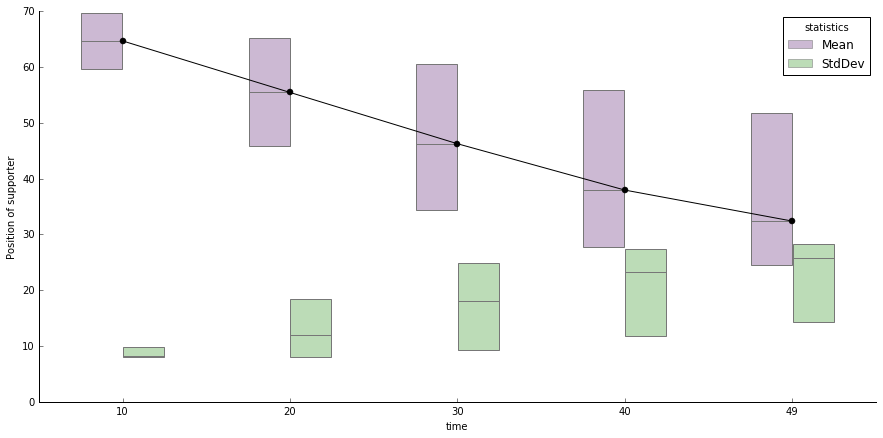

In [26]:
%matplotlib inline

import seaborn as sns

df=df6



fig, ax = plt.subplots(1,1, figsize=(15,7))

sns.boxplot(x="time", y="Position of supporter", hue="statistics", data=df, palette="PRGn", width = .5, showfliers=False)
sns.despine(offset=0, trim=False, bottom=False)
sns.set_style({'axes.axisbelow': True}, {'xtick.major.size': 4})



median_list_mean = []
#median_list_std = []
time_list = [10, 20, 30, 40, 49]

for time in time_list:
    median_list_mean.append(np.median(df.loc[(df['time']==time) & (df['statistics']=='Mean'), "Position of supporter"]))
    #median_list_std.append(np.median(df.loc[(df0['time']==time) & (df['statistics']=='StdDev'), "Position of supporter"]))

ax.plot(median_list_mean,'ko-',label='line1')
#ax.plot(median_list_std,'ko-',label='line2')
#plt.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_boxplots_supporter'), dpi=300, bbox_inches='tight')

## to show the destabilisation of ICE as a regime

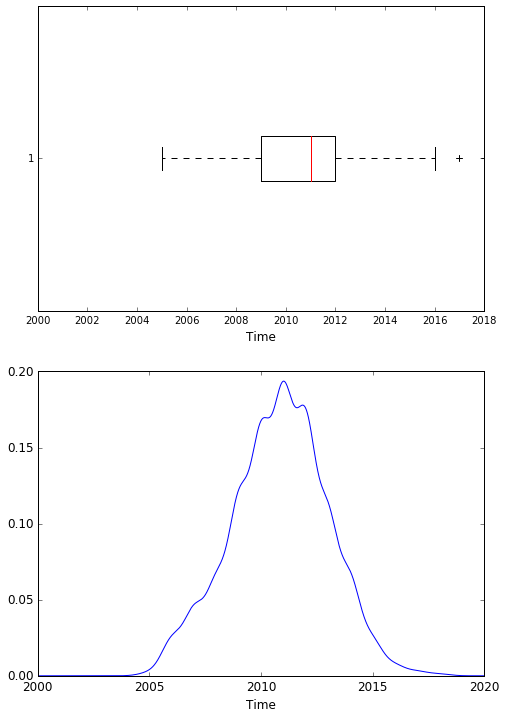

array([2009, 2010, 2012, ..., 2011, 2011, 2010], dtype=int64)

In [296]:
from ema_workbench.analysis.plotting_util import determine_kde


experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'ICE'].values

threshold = .5
indices = np.argmax(truncated_outcomes < threshold, axis=1)

logical= np.min(truncated_outcomes, axis=1) < threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]



fig, axes = plt.subplots(2, 1, figsize=(8, 12))


y, x = determine_kde(time, size_kde=10000,ymin=2000, ymax=2020)

bp = axes[0].boxplot(time, vert=False)
axes[0].set_xticks(np.arange(2000, 2020, 2))
axes[0].set_xlabel('Time', fontsize = 12)

for box in bp['boxes']:
    box.set(color='k', linewidth=1)
    
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1, linestyle='--')
    
for median in bp['medians']:
    median.set(color='red', linewidth=1)


axes[1].plot(x,y)
axes[1].set_xlabel('Time', fontsize = 12)

plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)



plt.show()

time

## to see the uptake of public transport takes place

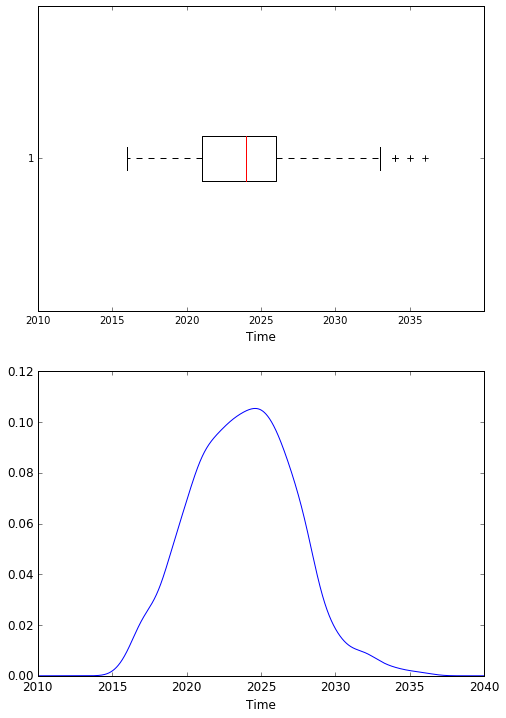

In [3]:
from ema_workbench.analysis.plotting_util import determine_kde

experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values

threshold = .5
indices = np.argmax(truncated_outcomes > threshold, axis=1)

logical= np.max(truncated_outcomes, axis=1) > threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))


y, x = determine_kde(time, size_kde=10000,ymin=2010, ymax=2040)

bp = axes[0].boxplot(time, vert=False)
axes[0].set_xticks(np.arange(2010, 2040, 5))
axes[0].set_xlabel('Time', fontsize = 12)

for box in bp['boxes']:
    box.set(color='k', linewidth=1)
    
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1, linestyle='--')
    
for median in bp['medians']:
    median.set(color='red', linewidth=1)


axes[1].plot(x,y)
axes[1].set_xlabel('Time', fontsize = 12)

plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)



plt.show()

## to show the end state position of ICE vs. public transport in the practice space

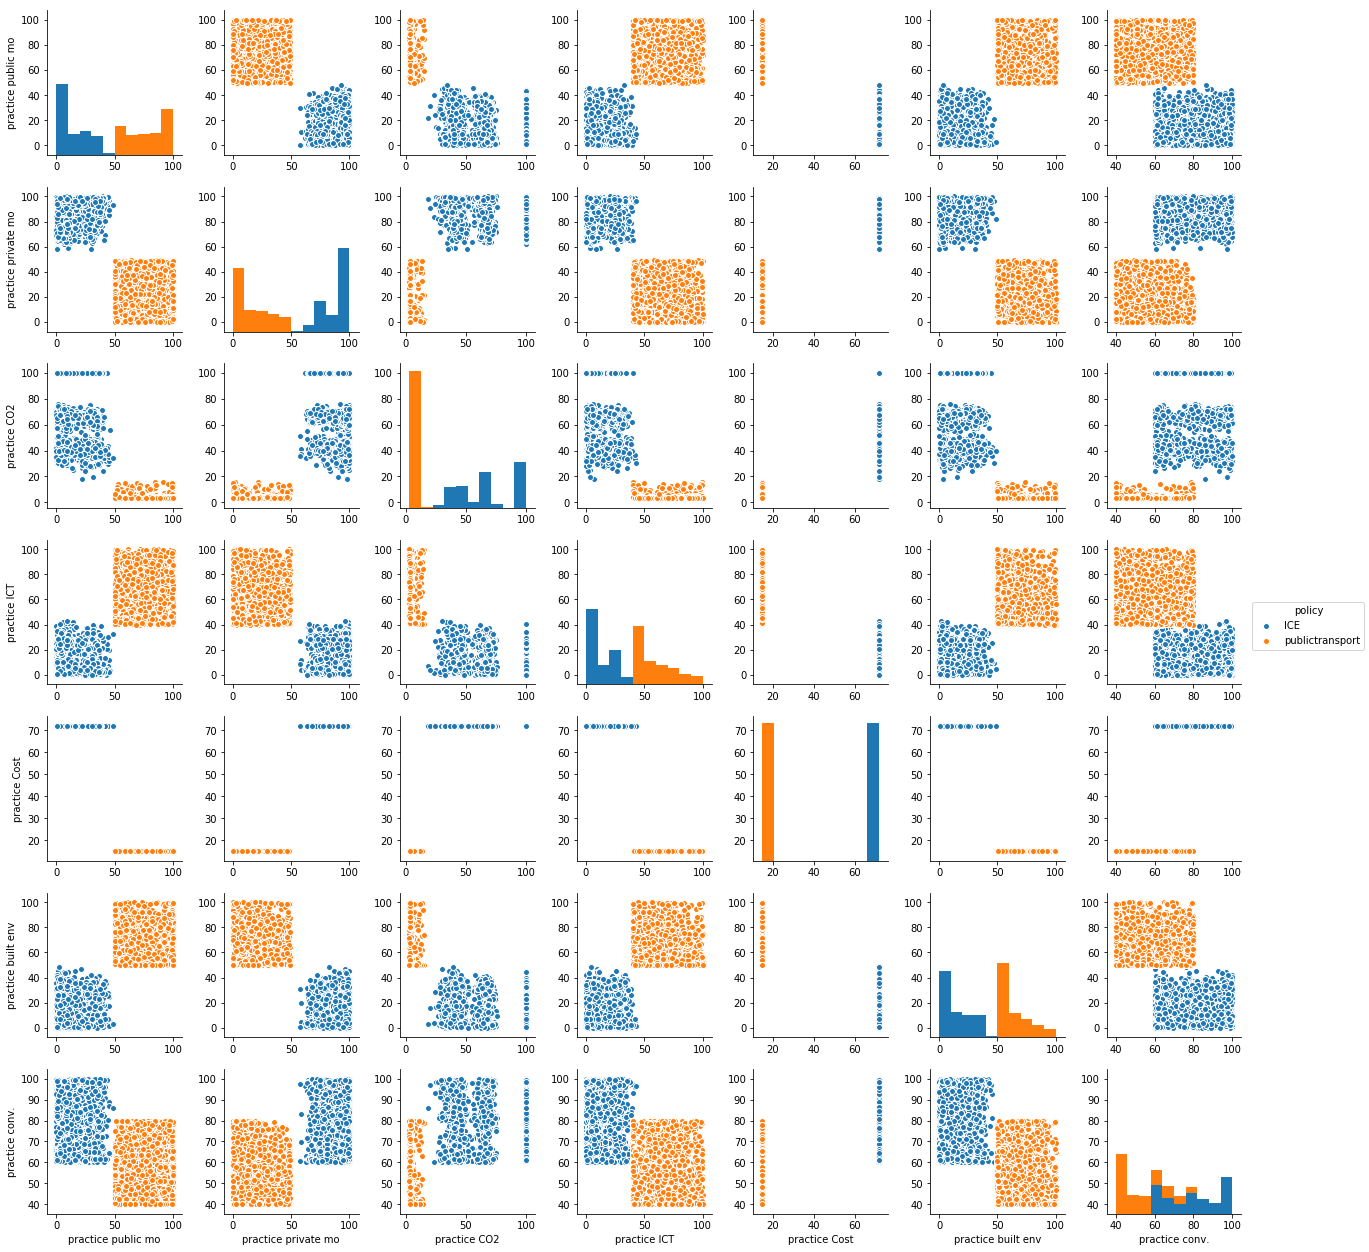

In [57]:
import seaborn as sns

experiments, outcomes = results

truncated_outcomes = { outcomes_key: outcomes[outcomes_key][:, -1] for outcomes_key in ['practice CO2', 'practice Cost', 'practice private mo', 'practice ICT', 
                        'practice built env', 'practice public mo', 'practice conv.'] }

df = pd.DataFrame.from_dict(truncated_outcomes)
df = df.assign(policy=experiments['policy'])


# rename the policies using numbers
#df['policy'] = df['policy'].map({p:i for i, p in
                                #enumerate(set(experiments['policy']))})
 
#use seaborn to plot the dataframe
grid = sns.pairplot(df, hue='policy',hue_order=['ICE', 'publictransport'],  vars=truncated_outcomes.keys())
ax = plt.gca()
plt.show()


In [ ]:
experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values

threshold = .5
indices = np.argmax(truncated_outcomes > threshold, axis=1)

logical= np.max(truncated_outcomes, axis=1) > threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]

## Scenario discovery

In [89]:
#truncate experiments and outcomes for a selected policy and a selected outcome in a timestep


experiments, outcomes = results

policies_list = np.unique(experiments['policy'])

uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directioncarCO2', 'directioncarCost', 'directioncarConv']
                     
nexp_policy = len(experiments)/len(policies_list)

truncated_exp = np.zeros(nexp_policy, dtype={'names':uncertainties, 'formats':['float64']*len(uncertainties)})
    
        
for i in range(nexp_policy):
    l = []
    for j, uncertainty in enumerate(uncertainties):
        cell = experiments[i][j]
        l.append(cell)
    unc_set = tuple(l)
    truncated_exp[i] = unc_set

    
ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values
truncated_outcomes_timeslice = truncated_outcomes [:, 20]

In [30]:
from ema_workbench.analysis import prim
 
 
x = truncated_exp
y = truncated_outcomes_timeslice > .5

prim_alg = prim.Prim(x, y, threshold=.5, threshold_type=1)
box1 = prim_alg.find_box()



NameError: name 'truncated_exp' is not defined

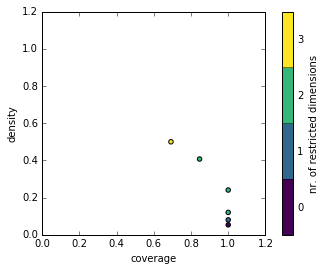

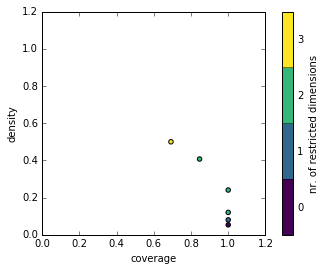

In [100]:
%matplotlib inline

box1.show_tradeoff()



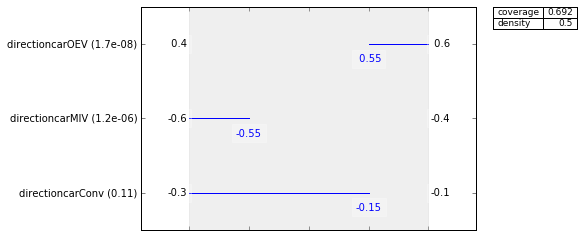

In [102]:
%matplotlib inline

box_1 = box1.inspect(5, style='graph')



## Dimensional stacking

In [86]:
#truncate experiments and outcomes for a selected policy and a selected outcome in a timestep


experiments, outcomes = results

policies_list = np.unique(experiments['policy'])

uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directioncarCO2', 'directioncarCost', 'directioncarConv']
                     
nexp_policy = len(experiments)/len(policies_list)

truncated_exp = np.zeros(nexp_policy, dtype={'names':uncertainties, 'formats':['float64']*len(uncertainties)})
    
        
for i in range(nexp_policy):
    l = []
    for j, uncertainty in enumerate(uncertainties):
        cell = experiments[i][j]
        l.append(cell)
    unc_set = tuple(l)
    truncated_exp[i] = unc_set

    
ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values
truncated_outcomes_timeslice = truncated_outcomes [:, 20]

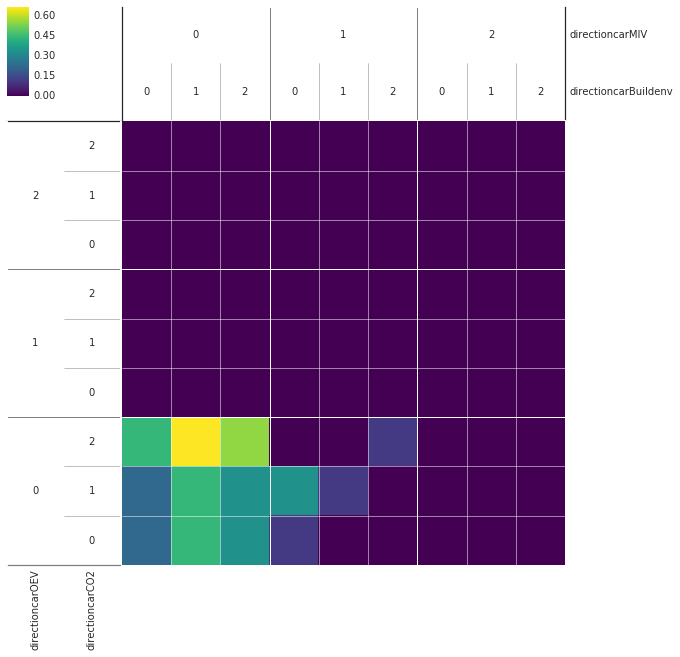

In [87]:
from ema_workbench.analysis import dimensional_stacking_2


x = truncated_exp
y = truncated_outcomes_timeslice > .5

dimensional_stacking_2.create_pivot_plot(x,y, nr_levels=2 ,nbins=3)
plt.show()

## Feature scoring

In [20]:
results = experiments, outcomes
ooilist = ['number supporter']

outcomes_scalar = {}

for ooi in ooilist:
    outcomes_scalar[ooi] = outcomes[ooi][:, -1]
    


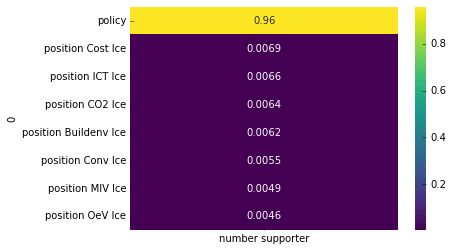

In [21]:
import seaborn as sns

from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_scalar

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

In [ ]:
%matplotlib inline

from __future__ import division
import csv

import scipy.stats as stats
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns

sns.set_style('white')

def normalize(data):
    minima = np.min(data, axis=0)
    maxima = np.max(data, axis=0)
    a = 1/(maxima-minima)
    b = minima/(minima-maxima)
    data = a * data + b                    
    return data


def make_kde(data):
    nr_points = 250
    grid = np.linspace(0, 1, nr_points)
    
    kde = stats.kde.gaussian_kde(data.T)
    x, y = np.meshgrid(grid, grid)
    grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    z = kde(grid_coords.T)
    z = z.reshape(nr_points,nr_points)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.flipud(z), cmap=cm.coolwarm)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig


def make_kde_scaled(class_data, full_data):
    nr_points = 250
    grid = np.linspace(0, 1, nr_points)
    
    x, y = np.meshgrid(grid, grid)
    grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    
    kde_class = stats.kde.gaussian_kde(class_data.T)
    z_class = kde_class(grid_coords.T)
    z_class = z_class.reshape(nr_points,nr_points)
    
    kde_full = stats.kde.gaussian_kde(full_data.T)
    z_full = kde_full(grid_coords.T)
    z_full = z_full.reshape(nr_points,nr_points)

    # rescale
    class_max = np.max(z_class)
    loc = np.where(z_class==class_max)
    full_at_loc = z_full[loc]
    
    z_class = (full_at_loc/class_max ) * z_class
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.flipud(z_class), vmax=np.max(z_full), cmap=cm.coolwarm)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig


def make_parallel_plot(data, labels):

    fig = plt.figure()
    axes = []
    
    for i in range(1, data.shape[1]):
        ax = fig.add_subplot(1,data.shape[1]-1,i,  ylim=(-0.1,1.1))
        axes.append(ax)
        ax.set_xlim([i,i+1])
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_ticklabels([labels[i-1]])
        ax.xaxis.set_tick_params(bottom=False, top=False)
        
        ax.yaxis.set_ticks([])
        ax.text(i, 1.01, "1", va="bottom", ha="center")
        ax.text(i, -0.01, "0", va="top", ha="center")
        
        ax.spines['left'].set_bounds(0, 1)
        ax.spines['right'].set_bounds(0, 1)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    ax.spines['right'].set_bounds(0, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator([i, i+1]))
    ax.xaxis.set_ticklabels(labels[i-1:i+1])
    ax.text(i+1, 1.01, "1", va="bottom", ha="center")
    ax.text(i+1, -0.01, "0", va="top", ha="center")
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label2On=True
    
    plt.subplots_adjust(wspace=0)
    
    return fig, axes


def plot_data_parallel(data, labels, classes):
    C = set(classes)
    C = list(C)
    C.sort()
    
    norm_data = normalize(data)
    figures = []
    for index, Ci in enumerate(C):
        fig, axes = make_parallel_plot(data, labels)
        fig.suptitle('class {}'.format(Ci), fontsize=20)
        figures.append(fig)
        logical = classes==Ci
        
        for i,j in zip(range(data.shape[1]-1),range(1,data.shape[1])):
            ax = axes[i]
            y = norm_data[logical==False, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='#C0C0C0')
            
            y = norm_data[logical, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='b')
            
    return figures

In [ ]:
# three outputs of interest are selected here
import numpy as np


oois = ['number supporter', 'practice CO2', 'practice Cost']



data = np.array([[outcomes[oois[0]].mean(axis=1)[i], outcomes[oois[1]][:,-1][i], outcomes[oois[2]][:,-1][i]] 
                 for i in range(len(experiments))])
data = normalize(data)

In [ ]:
#Optimum number of clusters is chosen here based on two criteria. 
#The graph shows two criteria for the Bayesian Information Criterion (BIC) and Aikake's Information Criterion (AIC), 
#fitting a GMM over a range of 1 to 10 possible clusters.

from sklearn import mixture

aic = []
bic = []
max_components = 15
x = [x for x in range(1,max_components)]

for nc in x:
    g = mixture.GMM(n_components=int(nc), n_iter=500)
    g.fit(data)
    if g.converged_:
        aic.append(g.aic(data))
        bic.append(g.bic(data))
    else:
        aic.append(None)
        bic.append(None)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)
pca_data = normalize(pca_data)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, aic, label='AIC')
ax.plot(x, bic, label='BIC')
ax.legend(loc='best')
ax.set_xlabel('Components')

plt.show()

In [ ]:
n_clusters = 5

g = mixture.GMM(n_components=n_clusters, n_iter=500)
g.fit(data)
pred = g.predict(data)

In [ ]:
from ema_workbench.analysis.pairs_plotting import pairs_scatter


header = ['number supporter', 'practice CO2', 'practice Cost']

labels = {'SubsurfaceUse':'Fraction of subsurface used','number supporter':'number supporter', 
          'practice CO2':'practice CO2', 'practice Cost':'practice Cost' }
            
temp_outcomes = {header[i]:data[:, i] for i in range(len(header))}
temp_experiments = pred.astype(np.str).view([('classes', np.str)])

temp_results = temp_experiments, temp_outcomes

fig, axes = pairs_scatter(temp_results, group_by='classes',
                          grouping_specifiers=set(temp_experiments['classes']),
                          ylabels=labels,
                          filter_scalar=False)

fig.set_size_inches(15,15,forward=True)


#plt.savefig('{}/fig{}_highres.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\EM Experiment Design\Implementation\figs', 'scatter_full_quartile_041017'), 
            #dpi=300, bbox_inches='tight') 

plt.show()

## Connector file

In [ ]:
import sys
sys.path.append(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\EMA\EMAworkbench-master_130118')

from ema_workbench.connectors import import_MATISSE_nopolicy


uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directiongreencarMIV', 'directiongreencarOEV', 'directiongreencarICT', 'directiongreencarBuildenv', 
                 'directionslowMIV', 'directionslowOEV', 'directionslowICT', 'directionslowBuildenv', 
                 'directionpublicMIV', 'directionpublicOEV', 'directionpublicICT', 'directionpublicBuildenv']


outcomes_of_interest = ['state', 'number supporter', 'strength', 
                        'practice CO2', 'practice Cost', 'practice private mo', 'practice ICT', 
                        'practice built env', 'practice public mo', 'practice conv.', 
                        'direction CO2', 'direction Cost', 'direction private mo', 'direction ICT', 
                        'direction built env', 'direction public mo', 'direction conv.']

policies = [{'name':'bev', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\bev'}, 
            {'name':'biofuel', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\biofuel'}, 
            {'name':'carshare', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\carshare'}, 
            {'name':'hybrid', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\hybrid'}, 
            {'name':'hydrogen', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\hydrogen'}, 
            {'name':'ICE', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\ICE'}, 
            {'name':'publictransport', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\publictransport'}, 
            {'name':'slowmodes', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\slowmodes'}]

number_of_experiments = 147

x = import_MATISSE_nopolicy.ImportfromMATISSE(uncertainties, outcomes_of_interest, policies, number_of_experiments)

results = x.extract_results()

